In [7]:
import numpy as np
import pandas as pd
import psycopg2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
import pmdarima as pm
import ta


mse_list = []

def show_stock(stock_name):
    conn = psycopg2.connect(user = "stock_data_admin",
                                      password = "ece493_team4_stock_data",
                                      host = "162.246.156.44",
                                      port = "5432",
                                      database = "stock_data")

    stock = pd.read_sql_query("select * from stock_data where stock_name = '" + stock_name +"' order by time_stamp asc",con=conn)


    fig = plt.figure(figsize=(30,10))  # an empty figure with no axes
    print(stock.dtypes)

    plt.plot(stock['open'], label='open')
    plt.legend()
    plt.title("stock:" + stock_name)
    plt.show()
    return stock

stock_name            object
time_stamp    datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
dtype: object


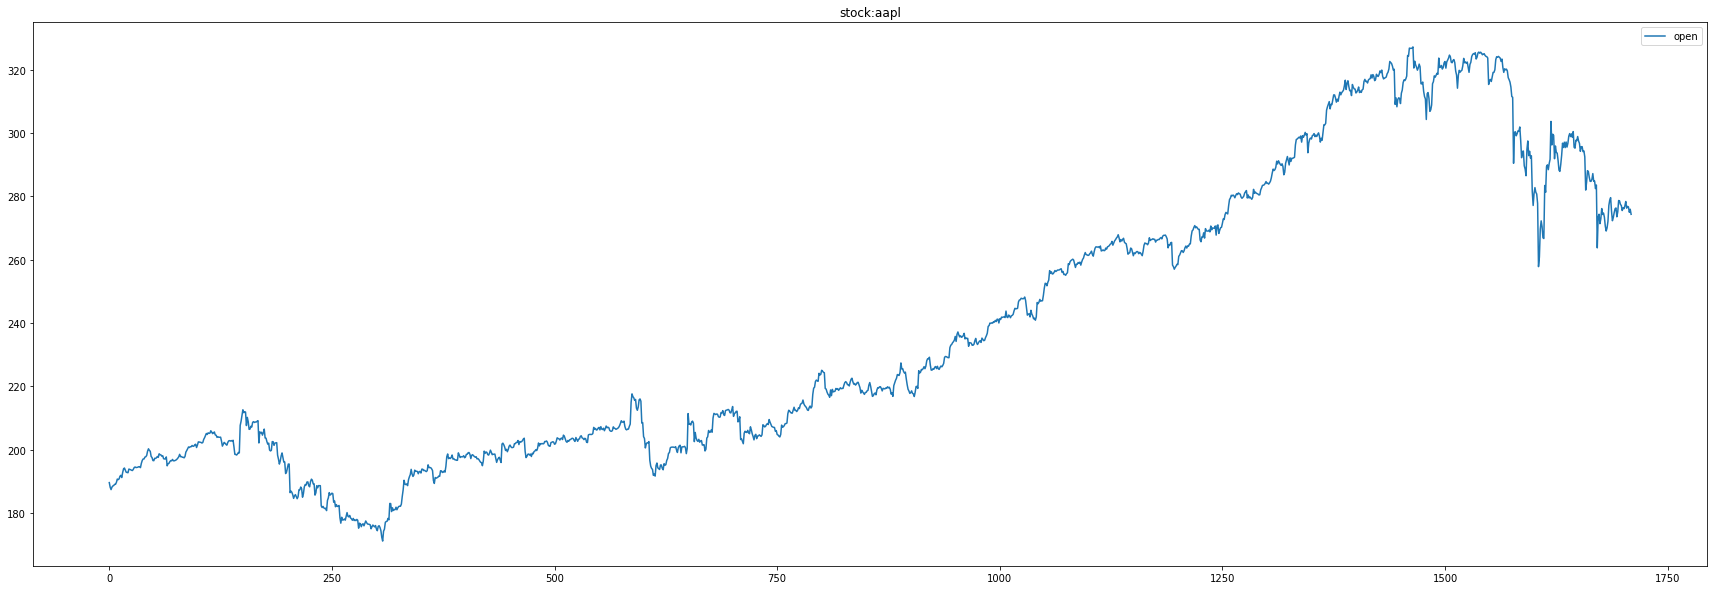

In [8]:
aapl = show_stock('aapl')
TRAIN_NUM = 1400
PRE_NUM = 7
train = aapl['open'][0:TRAIN_NUM]
test = aapl['open'][TRAIN_NUM:TRAIN_NUM+ PRE_NUM]

stock_name            object
time_stamp    datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
volume                 int64
dtype: object


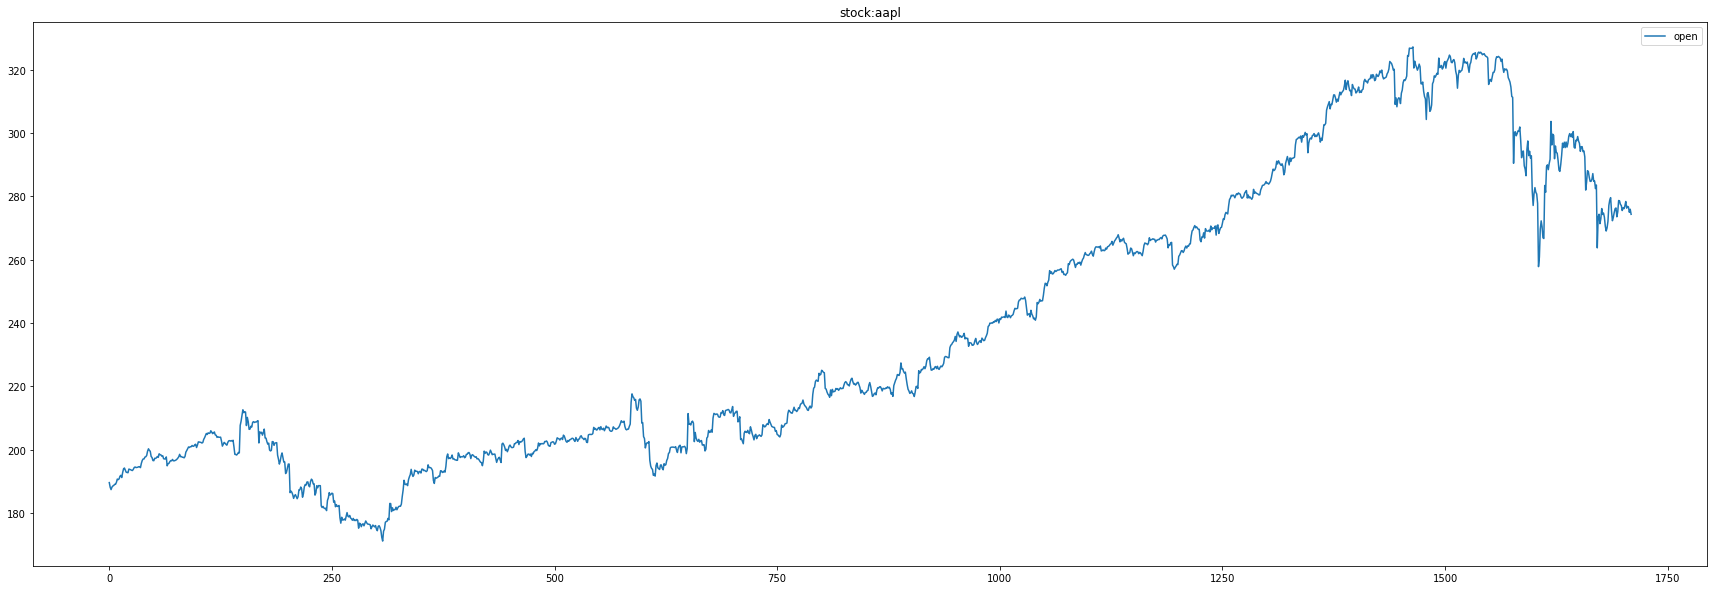

,stock_name,time_stamp,open,high,low,close,volume
0,aapl,2019-04-01 09:00:00,189.6100,189.65,187.69,188.140,3512456
1,aapl,2019-04-01 10:00:00,188.1400,188.47,186.39,187.390,5368143
2,aapl,2019-04-01 11:00:00,187.4000,188.38,187.40,188.190,2927505
3,aapl,2019-04-01 12:00:00,188.1900,188.56,187.84,188.540,1688503
4,aapl,2019-04-01 13:00:00,188.5500,188.76,187.92,188.700,1701487
...,...,...,...,...,...,...,...
1705,aapl,2020-03-11 13:00:00,276.8600,277.08,274.11,274.960,4864890
1706,aapl,2020-03-11 13:30:04,276.6800,276.68,276.68,276.680,0
1707,aapl,2020-03-11 14:00:00,274.9900,277.97,272.21,274.365,8138091
1708,aapl,2020-03-11 14:30:06,275.9500,275.95,275.95,275.950,0


In [9]:
show_stock('aapl')

In [10]:
fit1 = pm.auto_arima(train, m=7, trace=True, suppress_warnings=True)

Performing stepwise search to minimize aic
Fit ARIMA: (2, 2, 2)x(1, 0, 1, 7) (constant=True); AIC=4674.906, BIC=4716.848, Time=5.807 seconds
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 7) (constant=True); AIC=5659.897, BIC=5670.382, Time=0.088 seconds
Fit ARIMA: (1, 2, 0)x(1, 0, 0, 7) (constant=True); AIC=5242.920, BIC=5263.892, Time=0.408 seconds
Fit ARIMA: (0, 2, 1)x(0, 0, 1, 7) (constant=True); AIC=4668.660, BIC=4689.631, Time=2.623 seconds
Near non-invertible roots for order (0, 2, 1)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 0.999)
Fit ARIMA: (0, 2, 0)x(0, 0, 0, 7) (constant=False); AIC=5657.897, BIC=5663.140, Time=0.064 seconds
Fit ARIMA: (2, 2, 2)x(0, 0, 1, 7) (constant=True); AIC=4673.202, BIC=4709.902, Time=4.255 seconds
Near non-invertible roots for order (2, 2, 2)(0, 0, 1, 7); setting score to inf (at least one inverse root too close to the border of the unit circle: 1.000)
Fit ARIMA: (2, 2, 2)x(1, 0, 0, 7) (constant=True); A

In [48]:
preds, conf_int = fit1.predict(7, return_conf_int=True)
x_axis = np.arange(train.shape[0] + test.shape[0])

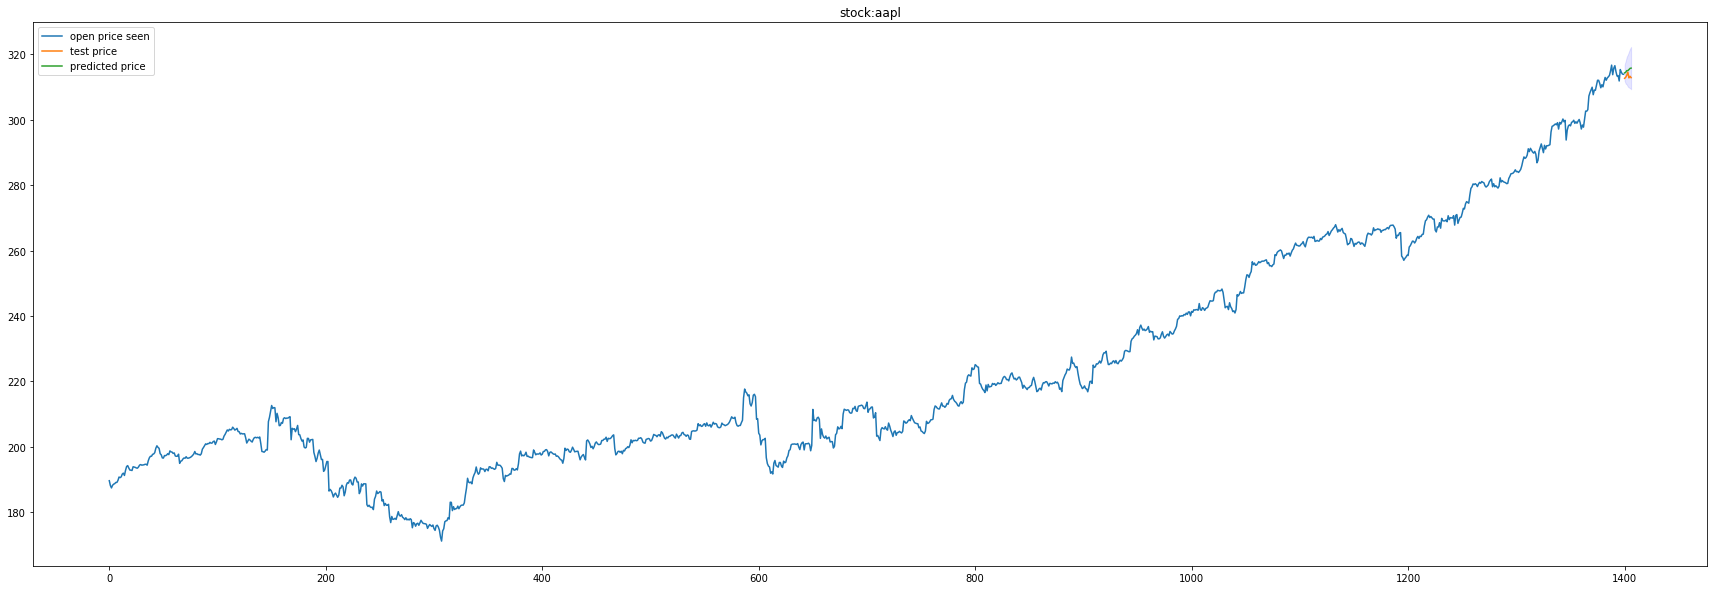

In [49]:
fig = plt.figure(figsize=(30,10))  # an empty figure with no axes

plt.plot(x_axis[:train.shape[0]],train,label = 'open price seen')
plt.plot(x_axis[train.shape[0]:],pd.Series(test),label = 'test price')
plt.plot(x_axis[train.shape[0]:],pd.Series(preds),label = 'predicted price')
plt.fill_between(x_axis[train.shape[0]:],
                 conf_int[:, 0], conf_int[:, 1],
                 alpha=0.1, color='b')


plt.legend()
plt.title("stock:" + "aapl")
plt.show()

1400


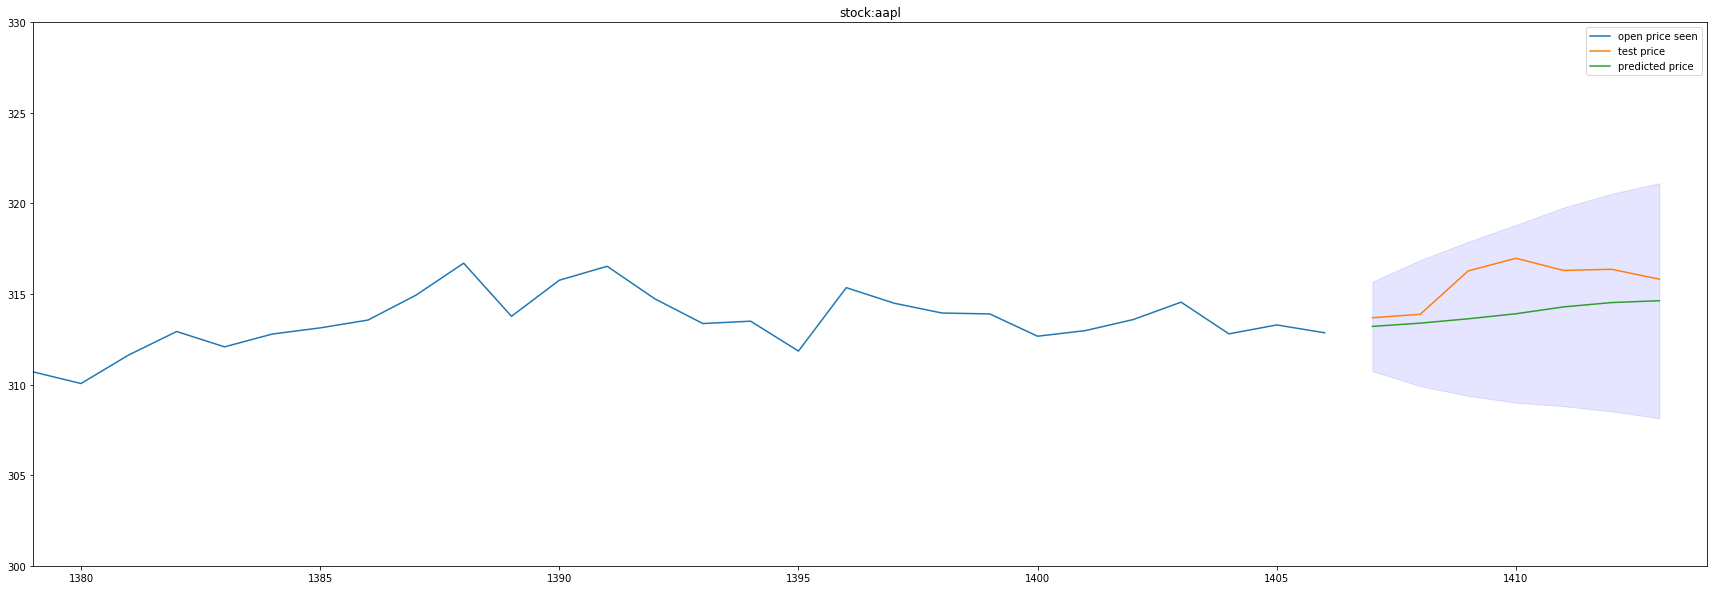

1407    313.690
1408    313.880
1409    316.270
1410    316.972
1411    316.300
1412    316.365
1413    315.820
Name: open, dtype: float64
0    313.211845
1    313.391438
2    313.631249
3    313.909102
4    314.289698
5    314.526437
6    314.630005
dtype: float64
mean suqaure error
3.6641985118040243
1407


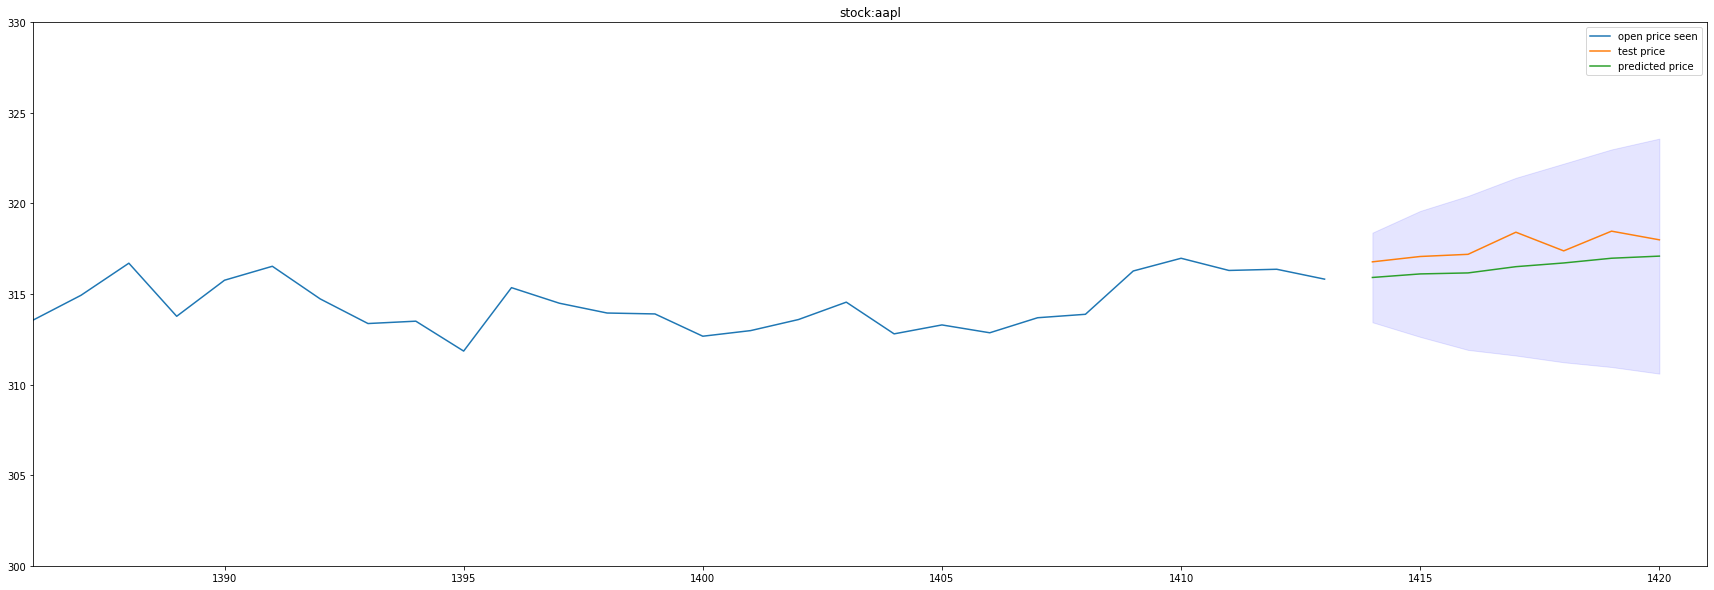

1414    316.775
1415    317.070
1416    317.190
1417    318.410
1418    317.380
1419    318.468
1420    317.990
Name: open, dtype: float64
0    315.912253
1    316.108309
2    316.163450
3    316.508070
4    316.712592
5    316.974021
6    317.090573
dtype: float64
mean suqaure error
1.4038142867085388
1414


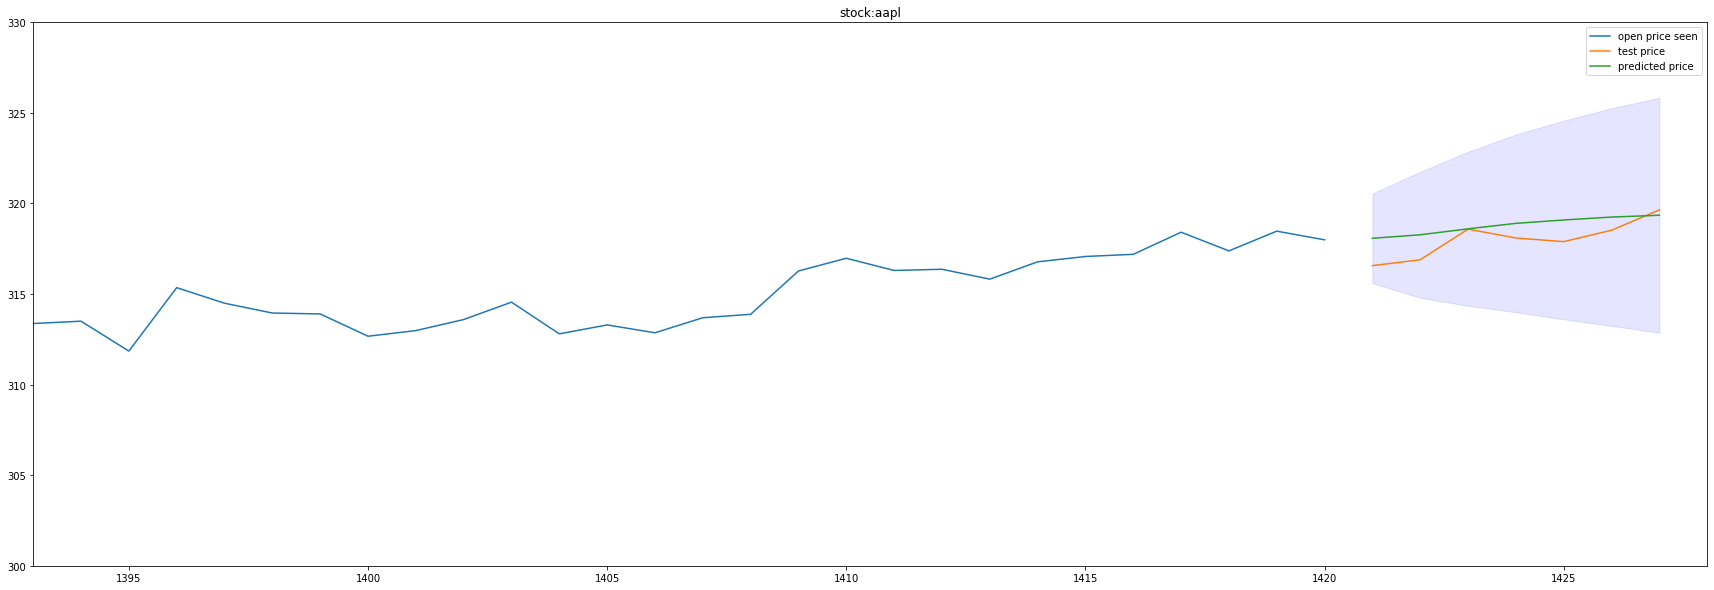

1421    316.566
1422    316.890
1423    318.580
1424    318.090
1425    317.890
1426    318.520
1427    319.640
Name: open, dtype: float64
0    318.074519
1    318.267891
2    318.596842
3    318.898805
4    319.084347
5    319.245887
6    319.346267
dtype: float64
mean suqaure error
0.9811884451696107
1421


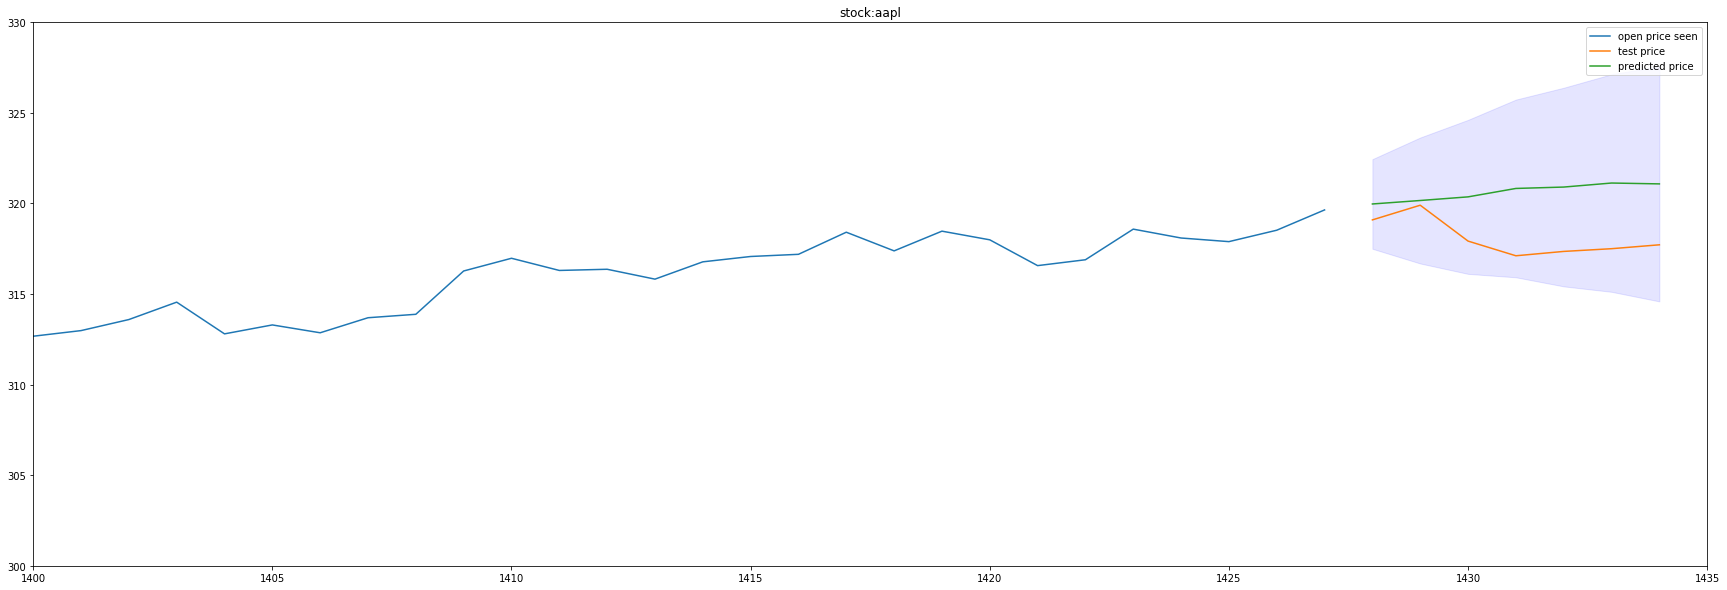

1428    319.090
1429    319.900
1430    317.920
1431    317.110
1432    317.350
1433    317.500
1434    317.715
Name: open, dtype: float64
0    319.968186
1    320.160223
2    320.360394
3    320.825298
4    320.901639
5    321.124043
6    321.076744
dtype: float64
mean suqaure error
8.235291723971217
1428


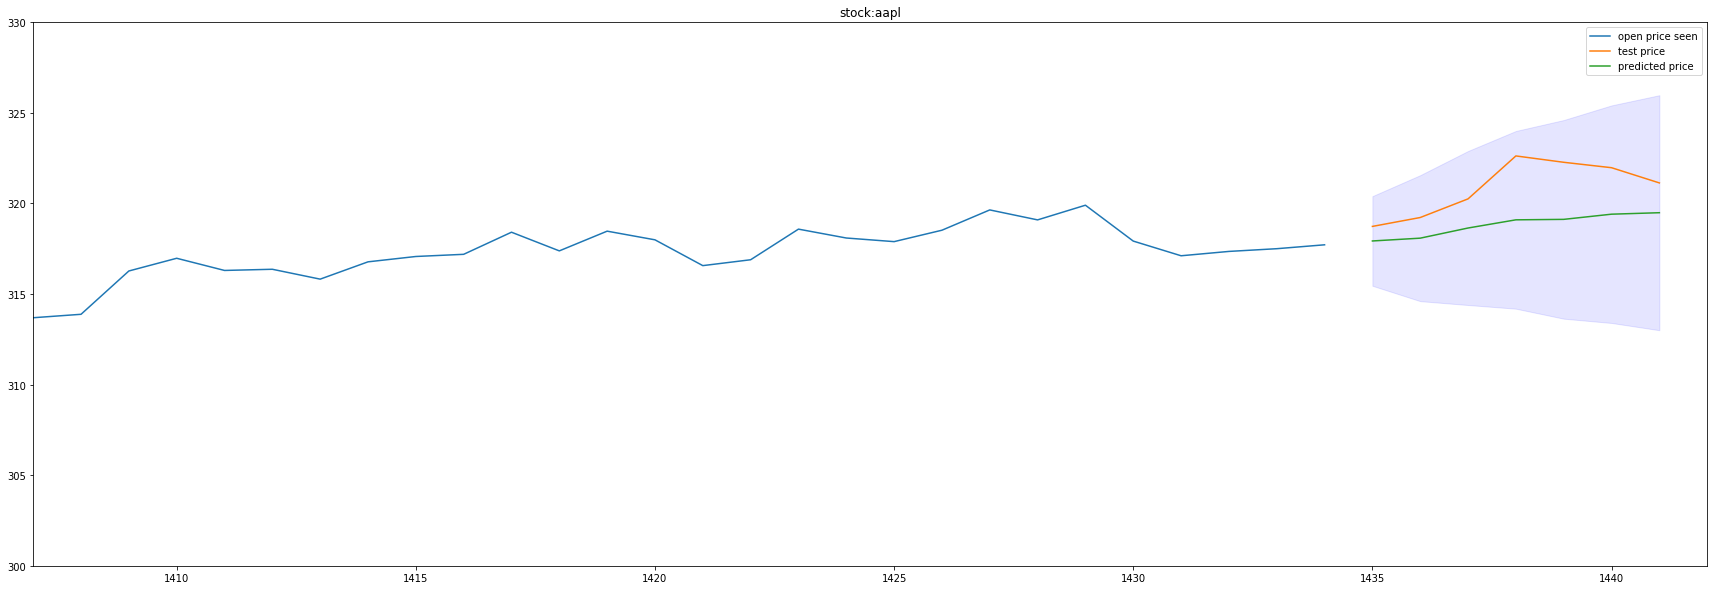

1435    318.730
1436    319.221
1437    320.250
1438    322.620
1439    322.269
1440    321.970
1441    321.130
Name: open, dtype: float64
0    317.926697
1    318.081680
2    318.641822
3    319.093245
4    319.119074
5    319.404780
6    319.486197
dtype: float64
mean suqaure error
5.167436526015223
1435


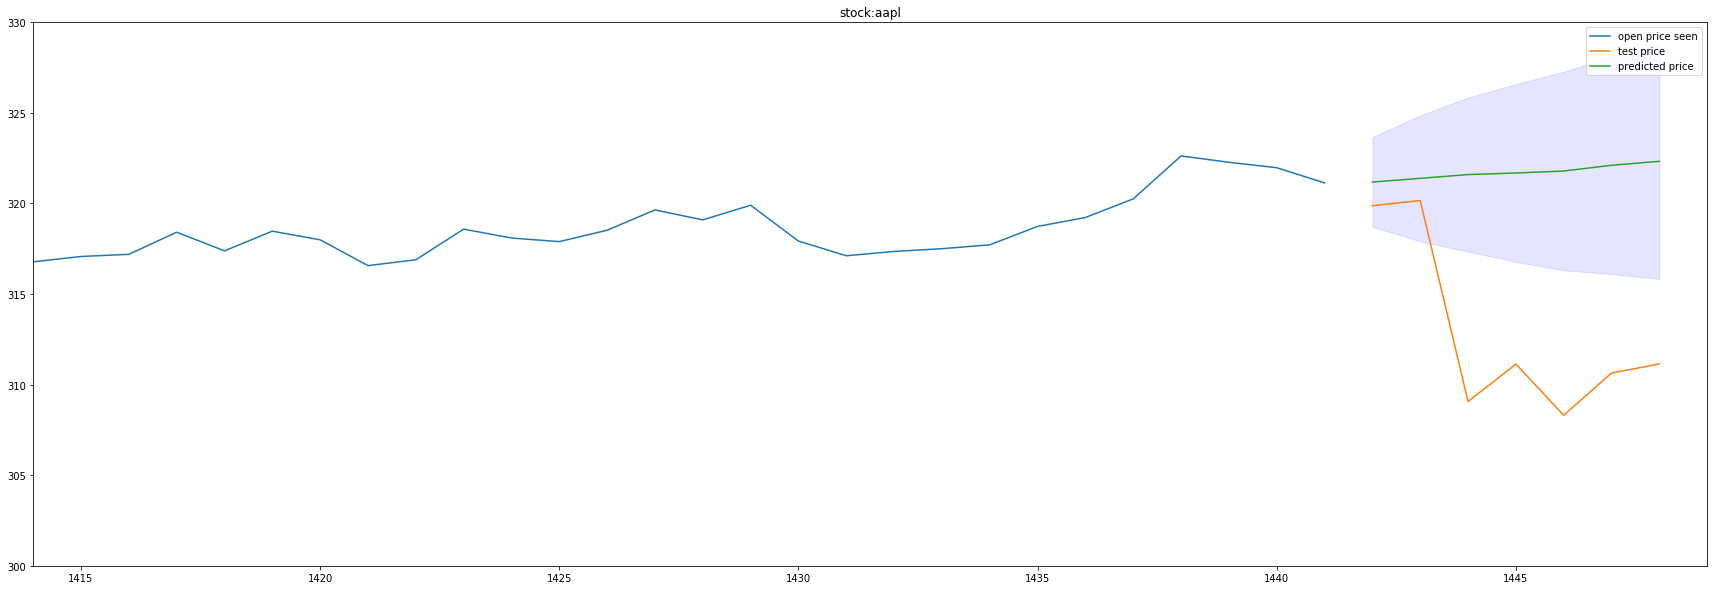

1442    319.8700
1443    320.1600
1444    309.0648
1445    311.1308
1446    308.3100
1447    310.6400
1448    311.1400
Name: open, dtype: float64
0    321.178785
1    321.382933
2    321.591824
3    321.677580
4    321.786894
5    322.104147
6    322.323364
dtype: float64
mean suqaure error
101.35576653927242
1442


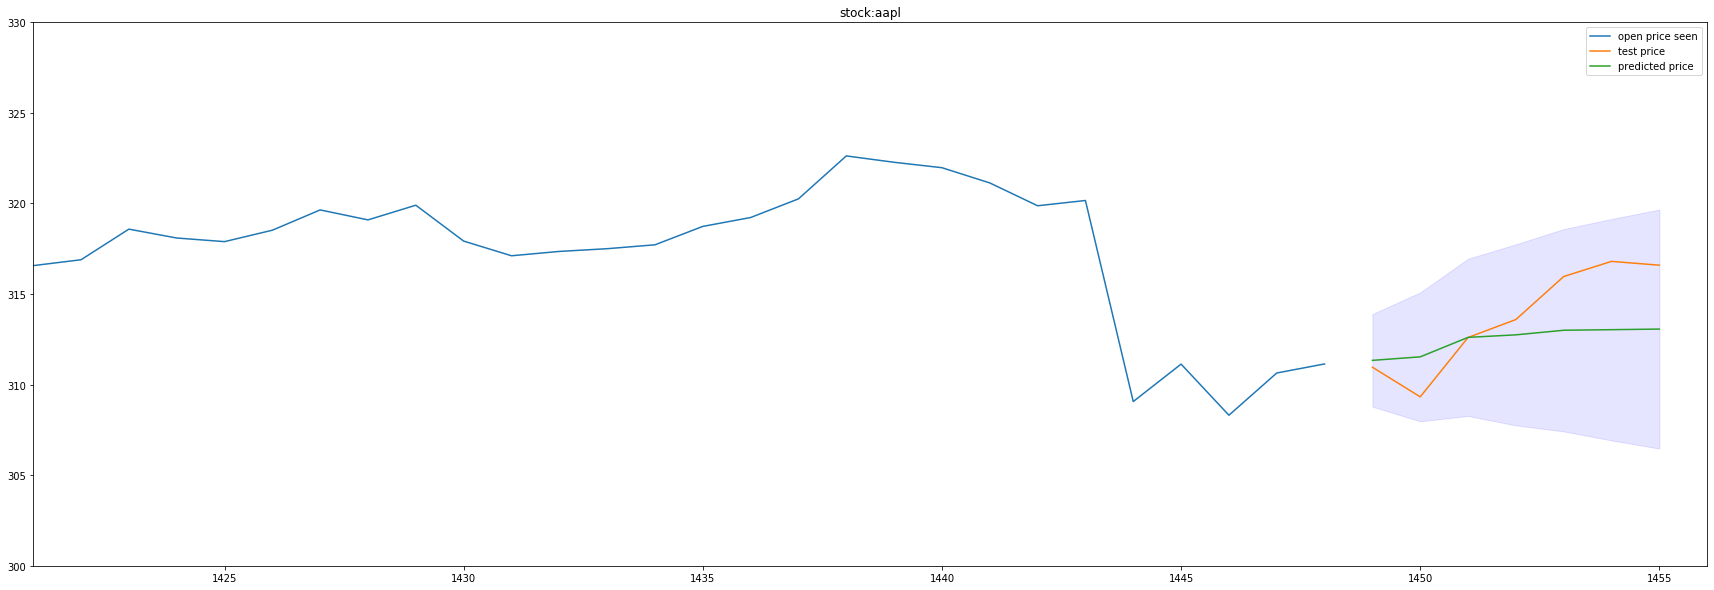

1449    310.9600
1450    309.3253
1451    312.6000
1452    313.5917
1453    315.9650
1454    316.8000
1455    316.5900
Name: open, dtype: float64
0    311.337743
1    311.531387
2    312.606474
3    312.745816
4    312.999477
5    313.031408
6    313.064554
dtype: float64
mean suqaure error
5.878636640237112
1449


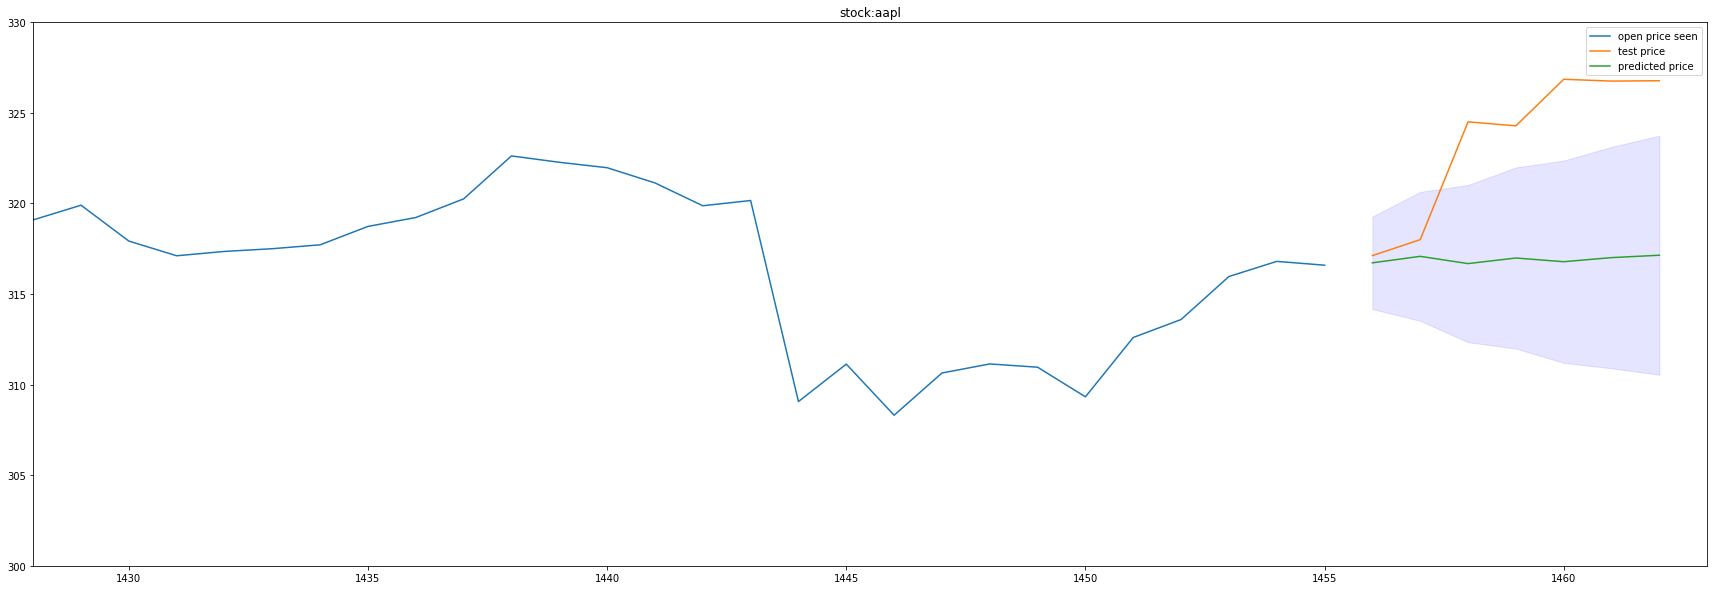

1456    317.1172
1457    318.0000
1458    324.5000
1459    324.2800
1460    326.8500
1461    326.7500
1462    326.7700
Name: open, dtype: float64
0    316.720129
1    317.077735
2    316.678445
3    316.986329
4    316.781896
5    317.007792
6    317.139824
dtype: float64
mean suqaure error
57.77146258220536
1456


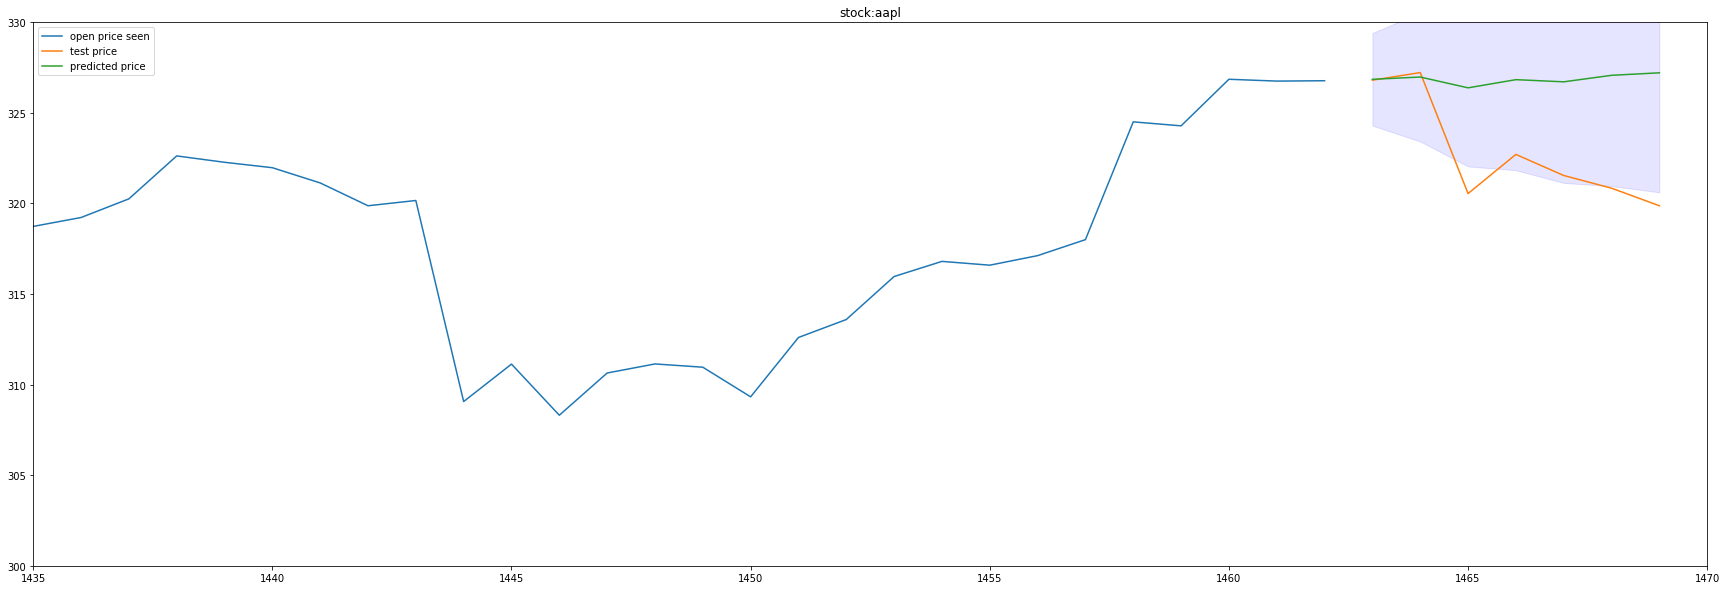

1463    326.8000
1464    327.2200
1465    320.5435
1466    322.7032
1467    321.5400
1468    320.8400
1469    319.8700
Name: open, dtype: float64
0    326.848239
1    326.973878
2    326.377754
3    326.829326
4    326.709138
5    327.068896
6    327.207034
dtype: float64
mean suqaure error
24.35393403412881
1463


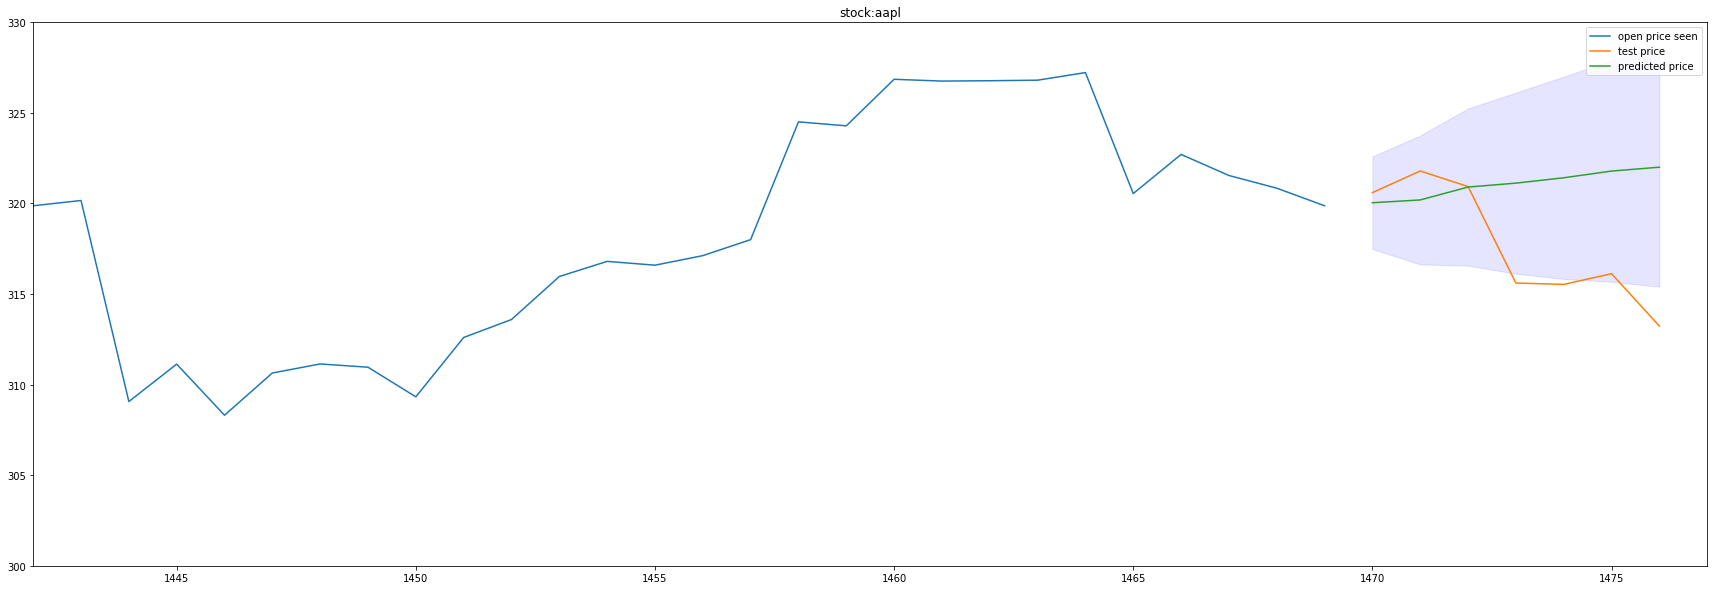

1470    320.595
1471    321.790
1472    320.930
1473    315.604
1474    315.530
1475    316.120
1476    313.230
Name: open, dtype: float64
0    320.036272
1    320.190223
2    320.902119
3    321.118348
4    321.413909
5    321.783888
6    321.997814
dtype: float64
mean suqaure error
25.264980606885633
1470


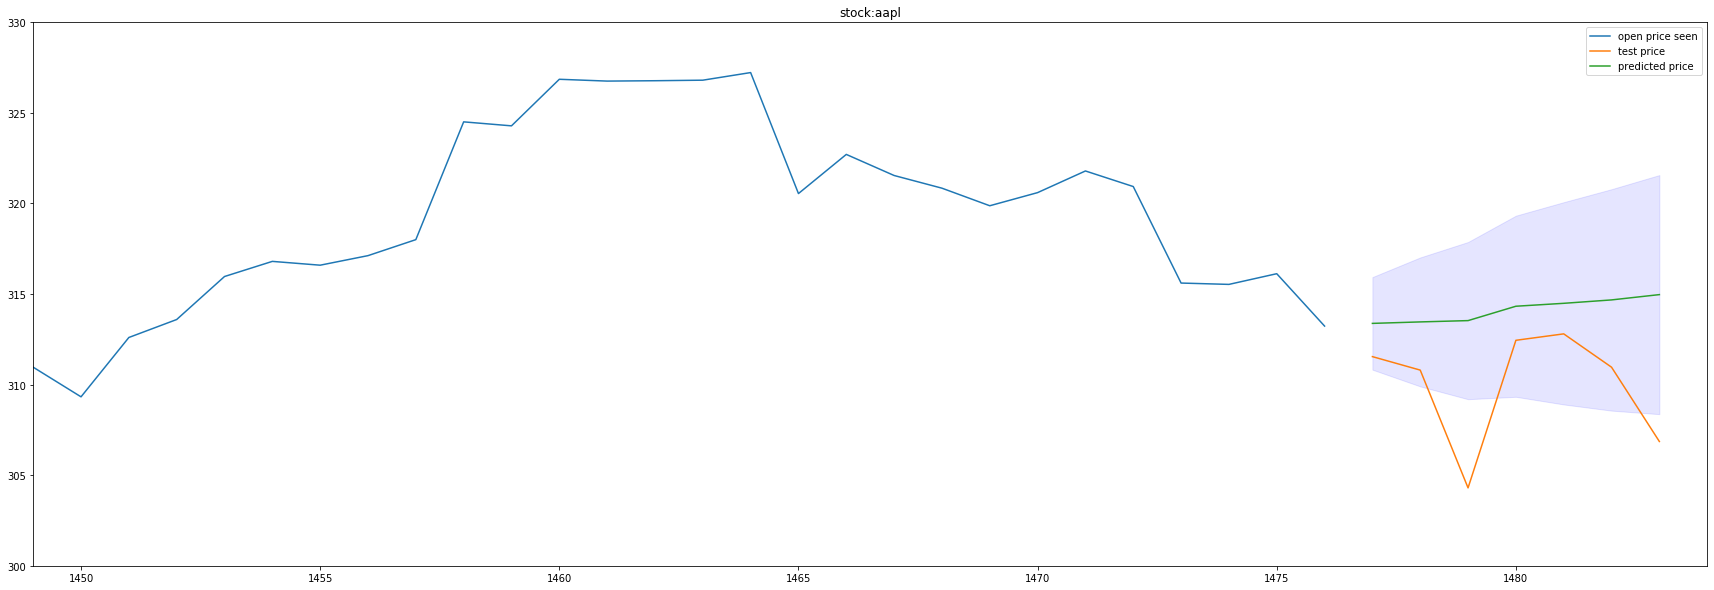

1477    311.5440
1478    310.8000
1479    304.3000
1480    312.4450
1481    312.8000
1482    310.9599
1483    306.8600
Name: open, dtype: float64
0    313.378084
1    313.459468
2    313.531754
3    314.324643
4    314.486019
5    314.673670
6    314.966244
dtype: float64
mean suqaure error
25.93441814554928
1477


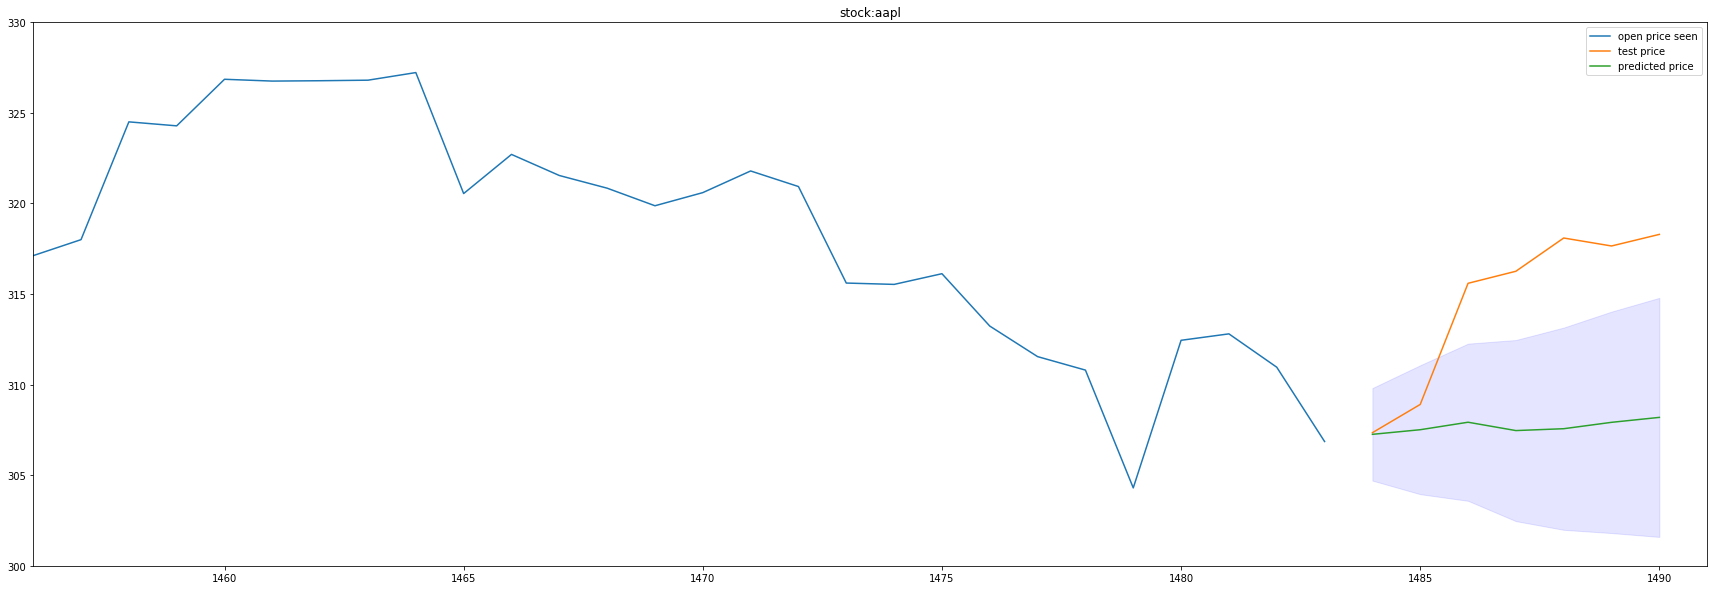

1484    307.3454
1485    308.9050
1486    315.5900
1487    316.2550
1488    318.0900
1489    317.6500
1490    318.2900
Name: open, dtype: float64
0    307.255326
1    307.510038
2    307.923453
3    307.462961
4    307.565760
5    307.917758
6    308.190675
dtype: float64
mean suqaure error
63.643207764747494
1484


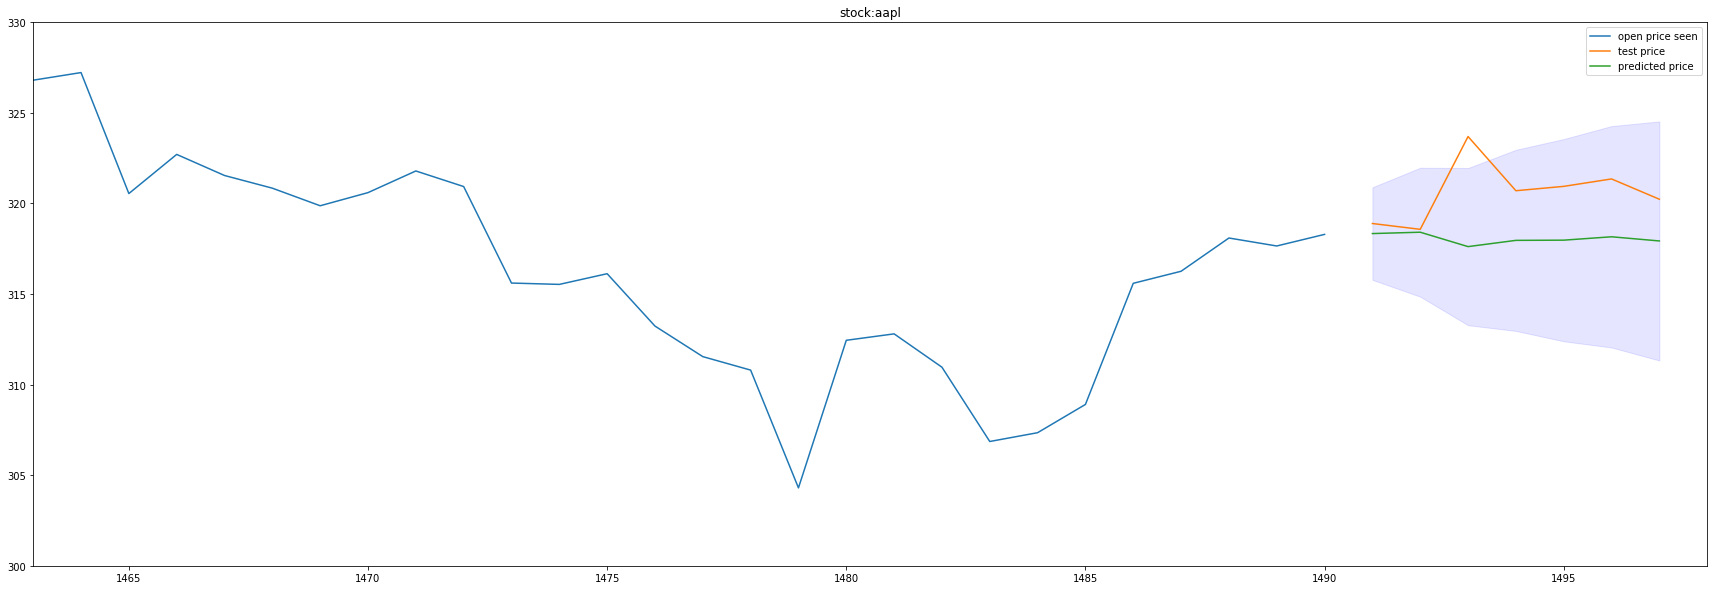

1491    318.8900
1492    318.5697
1493    323.6900
1494    320.7000
1495    320.9400
1496    321.3500
1497    320.2300
Name: open, dtype: float64
0    318.335027
1    318.409913
2    317.615187
3    317.959827
4    317.971314
5    318.157680
6    317.927433
dtype: float64
mean suqaure error
9.864463617176511
1491


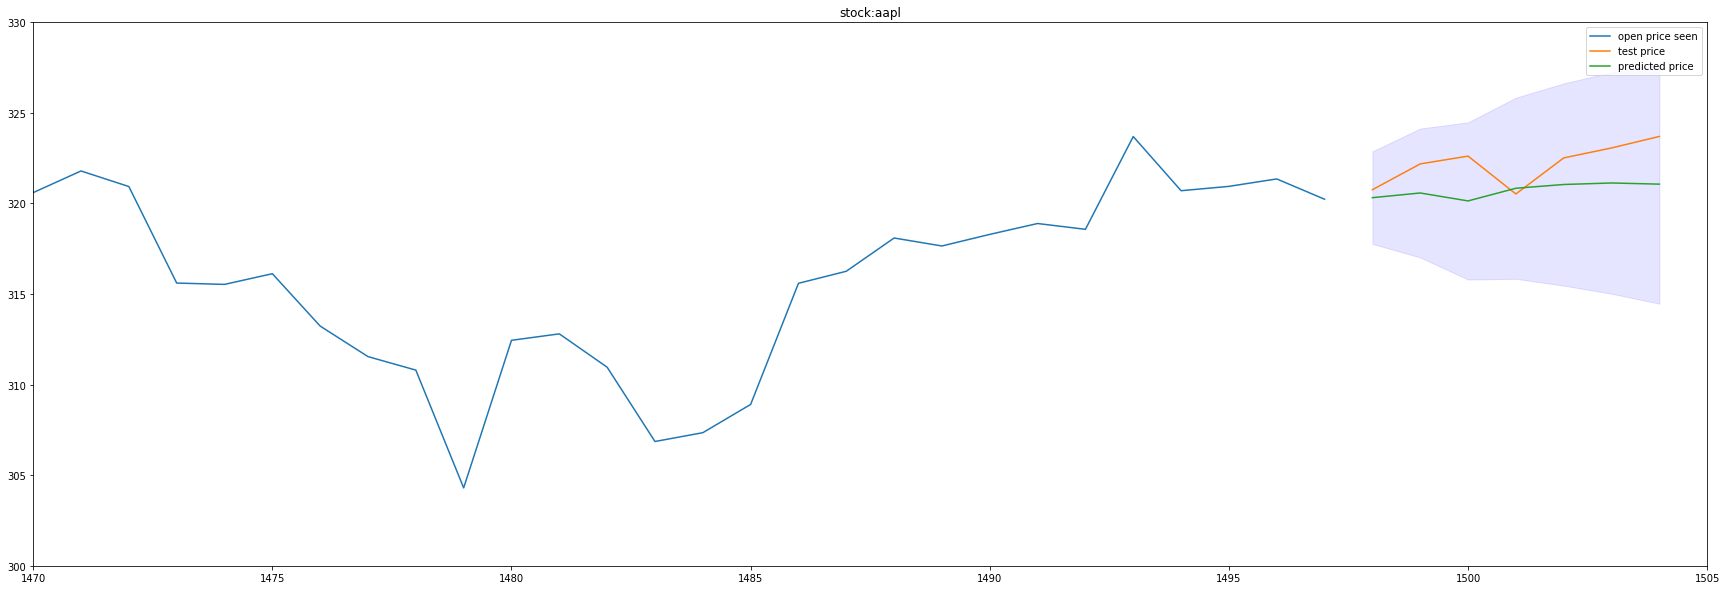

1498    320.755
1499    322.180
1500    322.610
1501    320.520
1502    322.510
1503    323.060
1504    323.695
Name: open, dtype: float64
0    320.316979
1    320.574792
2    320.136881
3    320.835819
4    321.043475
5    321.126600
6    321.063077
dtype: float64
mean suqaure error
3.11433728138933
1498


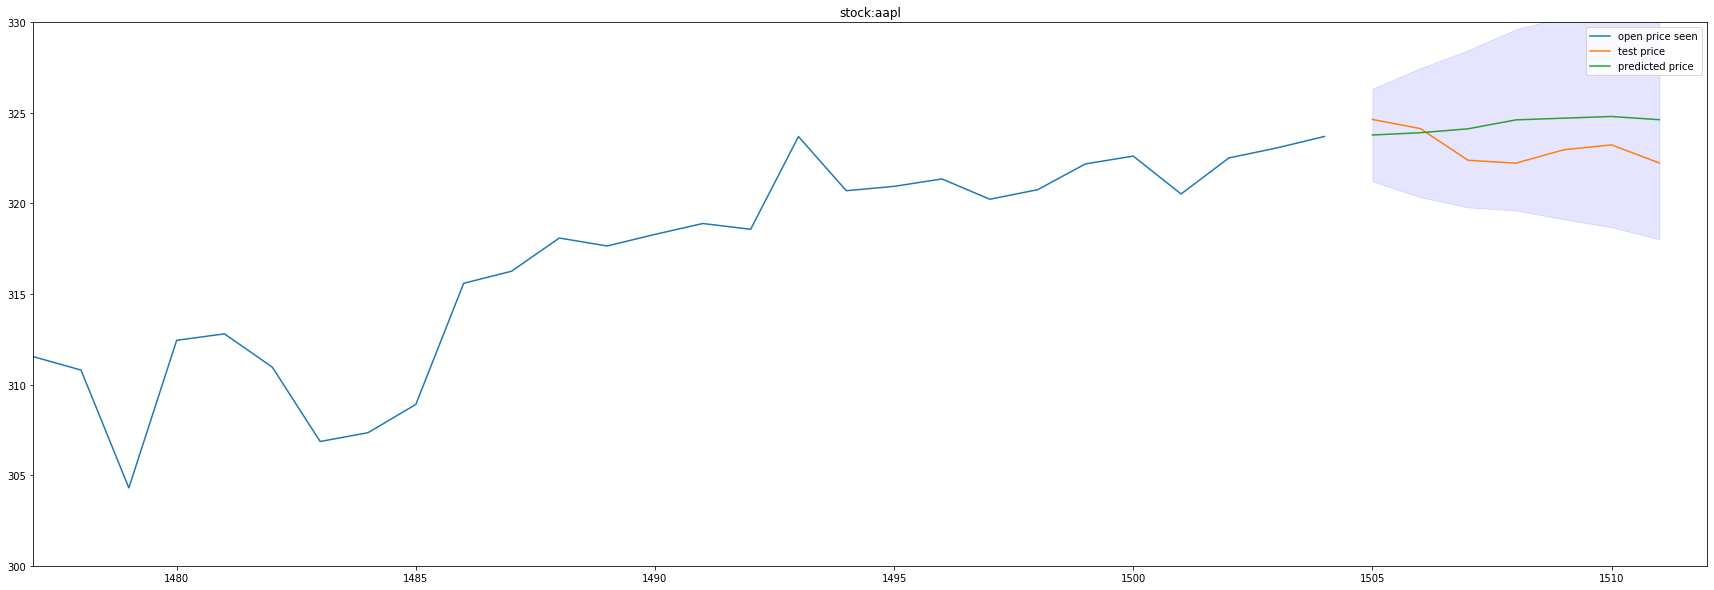

1505    324.6332
1506    324.1300
1507    322.3800
1508    322.2200
1509    322.9600
1510    323.2300
1511    322.2300
Name: open, dtype: float64
0    323.774911
1    323.899920
2    324.116892
3    324.609222
4    324.704243
5    324.796458
6    324.618703
dtype: float64
mean suqaure error
2.9595491176484265
1505


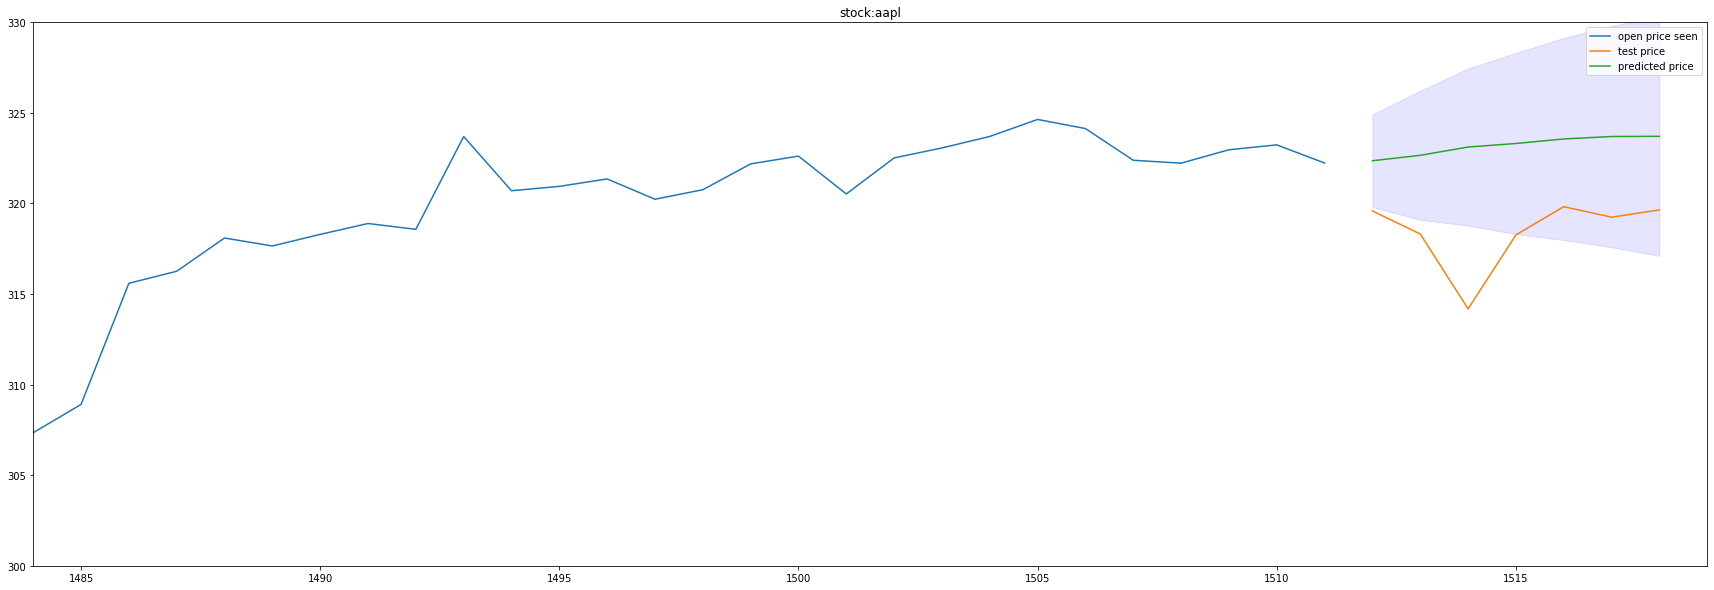

1512    319.5800
1513    318.3100
1514    314.1800
1515    318.2600
1516    319.8200
1517    319.2385
1518    319.6400
Name: open, dtype: float64
0    322.353397
1    322.653709
2    323.110291
3    323.306717
4    323.556208
5    323.692572
6    323.700914
dtype: float64
mean suqaure error
26.00971731315682
1512


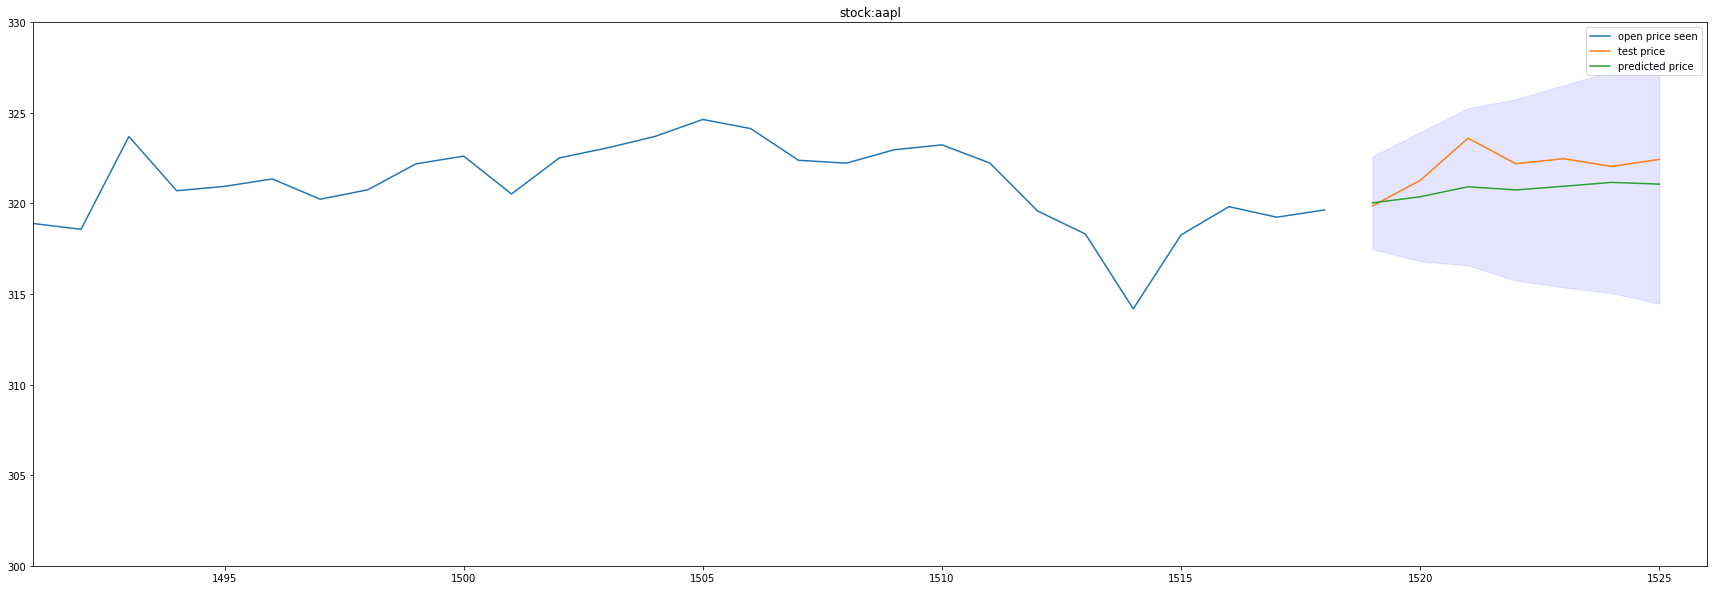

1519    319.8577
1520    321.2700
1521    323.6000
1522    322.1898
1523    322.4700
1524    322.0400
1525    322.4300
Name: open, dtype: float64
0    320.029921
1    320.366102
2    320.917770
3    320.743054
4    320.945412
5    321.159818
6    321.065141
dtype: float64
mean suqaure error
2.1565788796769163
1519


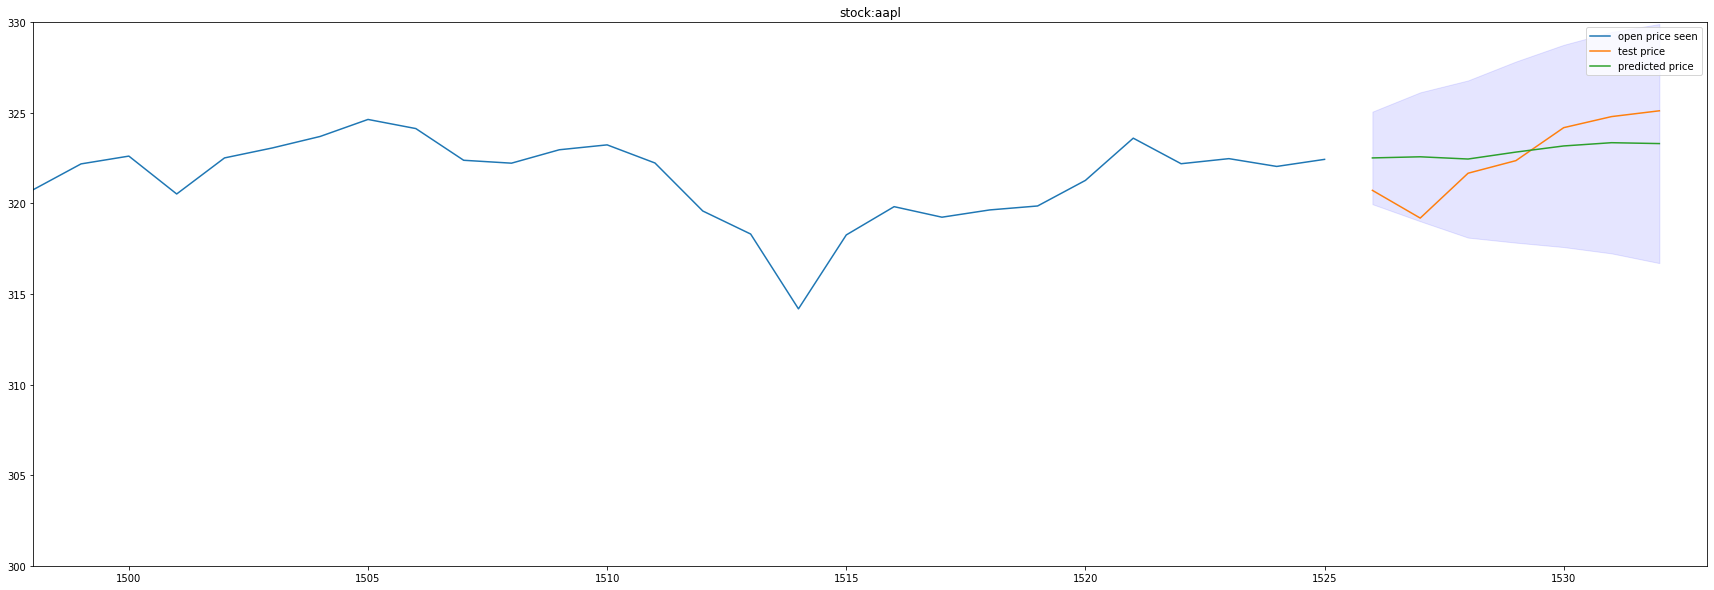

1526    320.7200
1527    319.1899
1528    321.6650
1529    322.3600
1530    324.1800
1531    324.7904
1532    325.1105
Name: open, dtype: float64
0    322.510206
1    322.572209
2    322.449035
3    322.831718
4    323.170435
5    323.350158
6    323.301304
dtype: float64
mean suqaure error
3.1212557694279695
1526


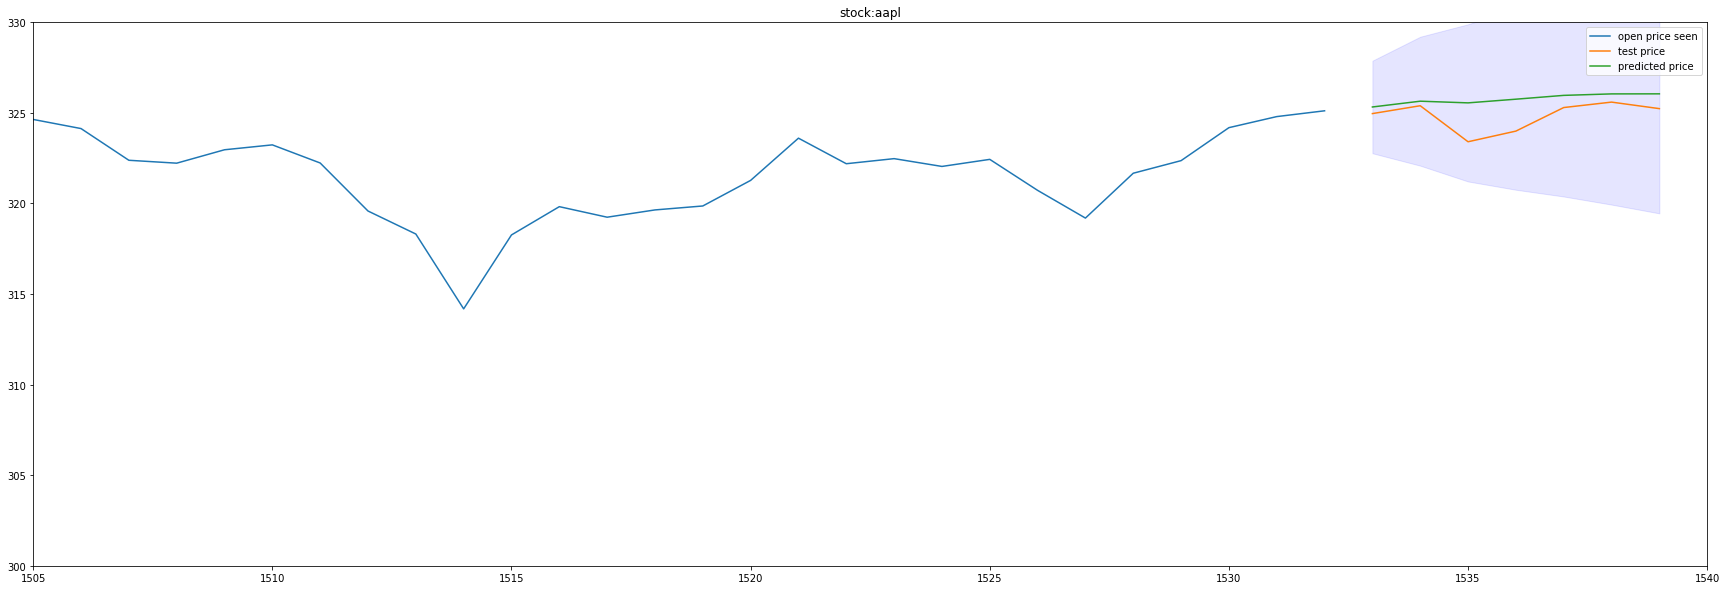

1533    324.9562
1534    325.3900
1535    323.4020
1536    323.9900
1537    325.2900
1538    325.5900
1539    325.2300
Name: open, dtype: float64
0    325.321378
1    325.640582
2    325.548070
3    325.751087
4    325.961688
5    326.043223
6    326.046432
dtype: float64
mean suqaure error
1.3180463510154945
1533


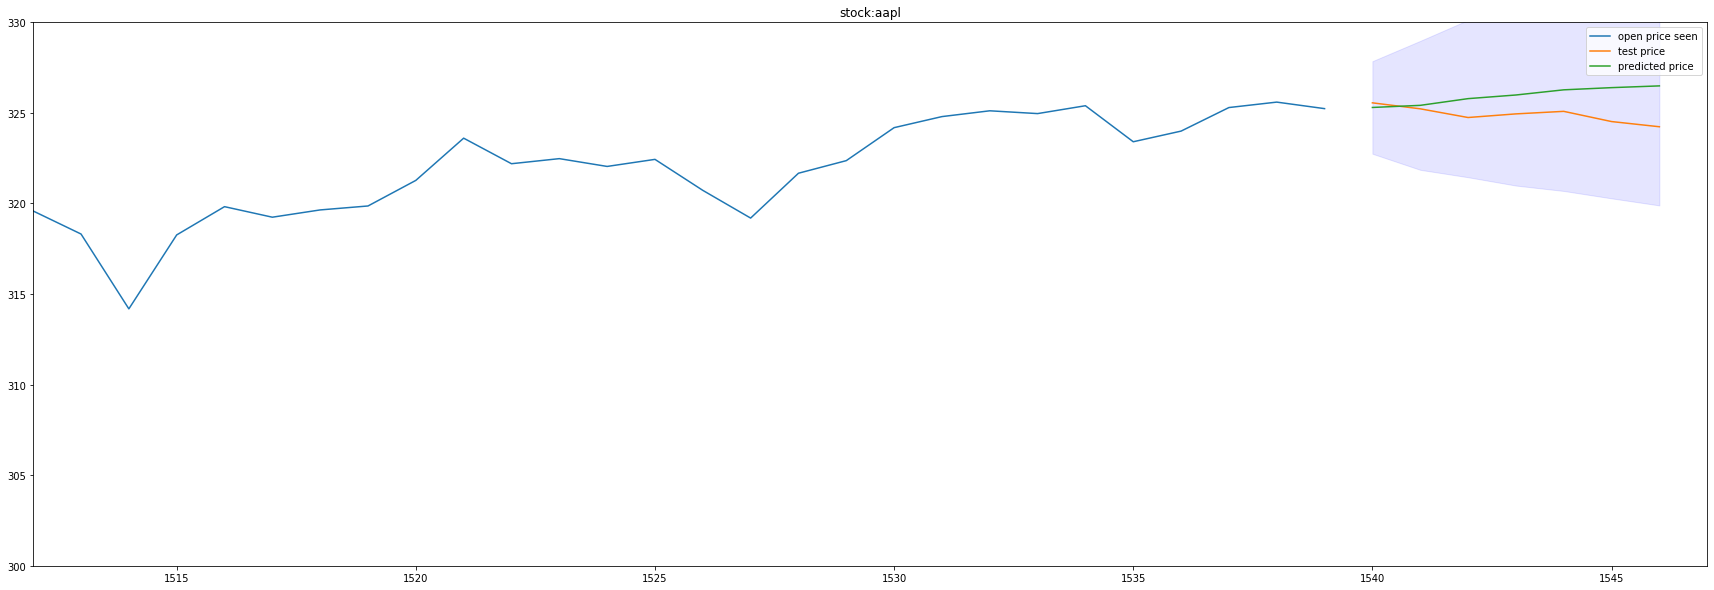

1540    325.5500
1541    325.2200
1542    324.7400
1543    324.9400
1544    325.0800
1545    324.5168
1546    324.2300
Name: open, dtype: float64
0    325.294497
1    325.411051
2    325.781696
3    325.982454
4    326.267613
5    326.388474
6    326.485027
dtype: float64
mean suqaure error
1.7531943932474492
1540


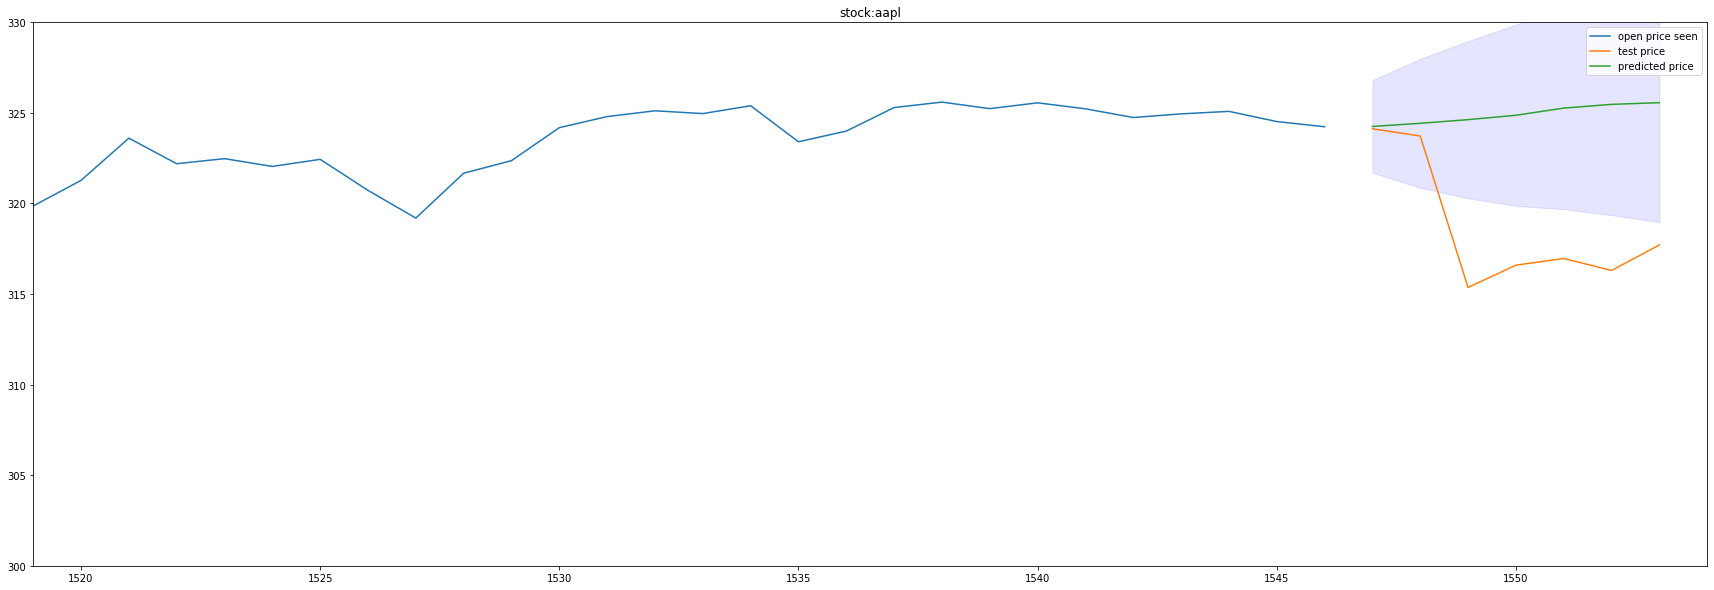

1547    324.120
1548    323.720
1549    315.360
1550    316.590
1551    316.960
1552    316.300
1553    317.705
Name: open, dtype: float64
0    324.246884
1    324.419865
2    324.622233
3    324.863328
4    325.258981
5    325.465101
6    325.558955
dtype: float64
mean suqaure error
52.75708568048753
1547


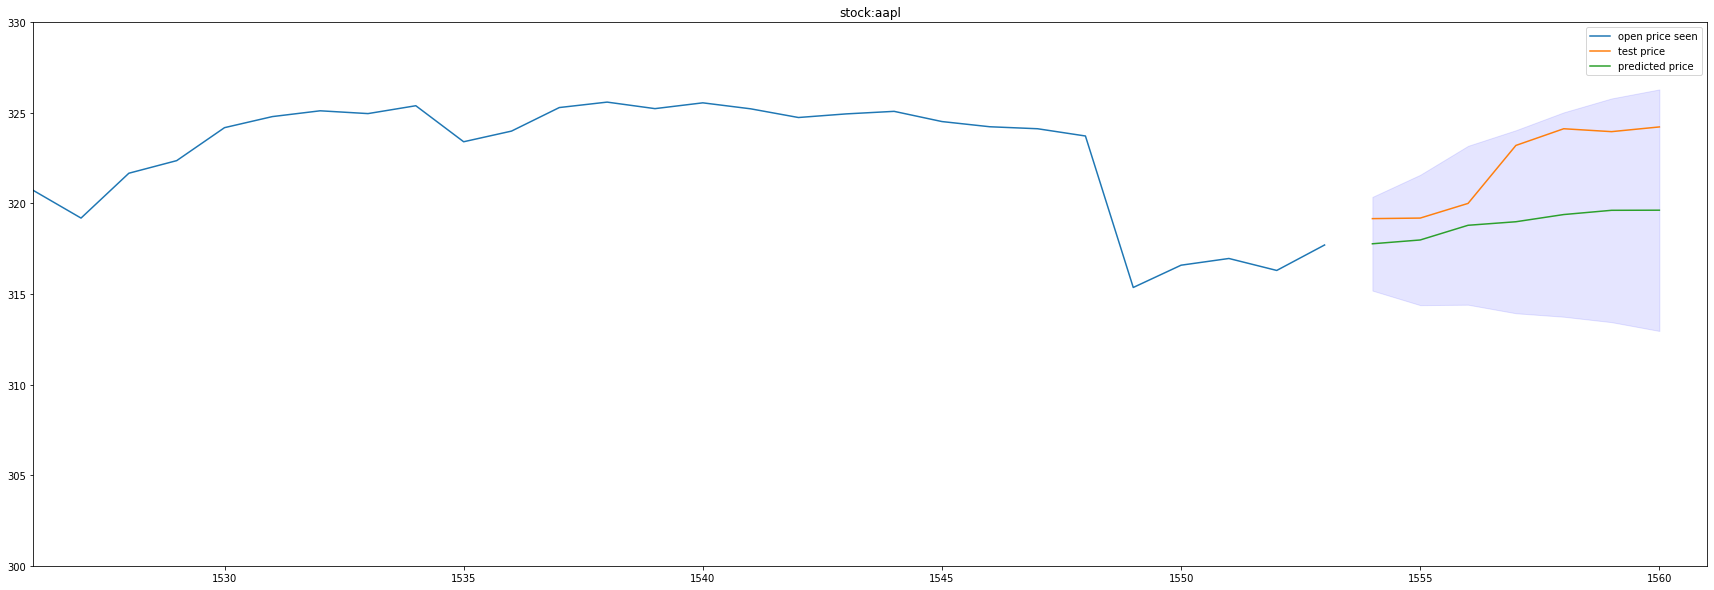

1554    319.1600
1555    319.1900
1556    320.0000
1557    323.1992
1558    324.1200
1559    323.9600
1560    324.2200
Name: open, dtype: float64
0    317.771955
1    317.981666
2    318.792394
3    318.987526
4    319.384743
5    319.618895
6    319.625140
dtype: float64
mean suqaure error
12.137691307534796
1554


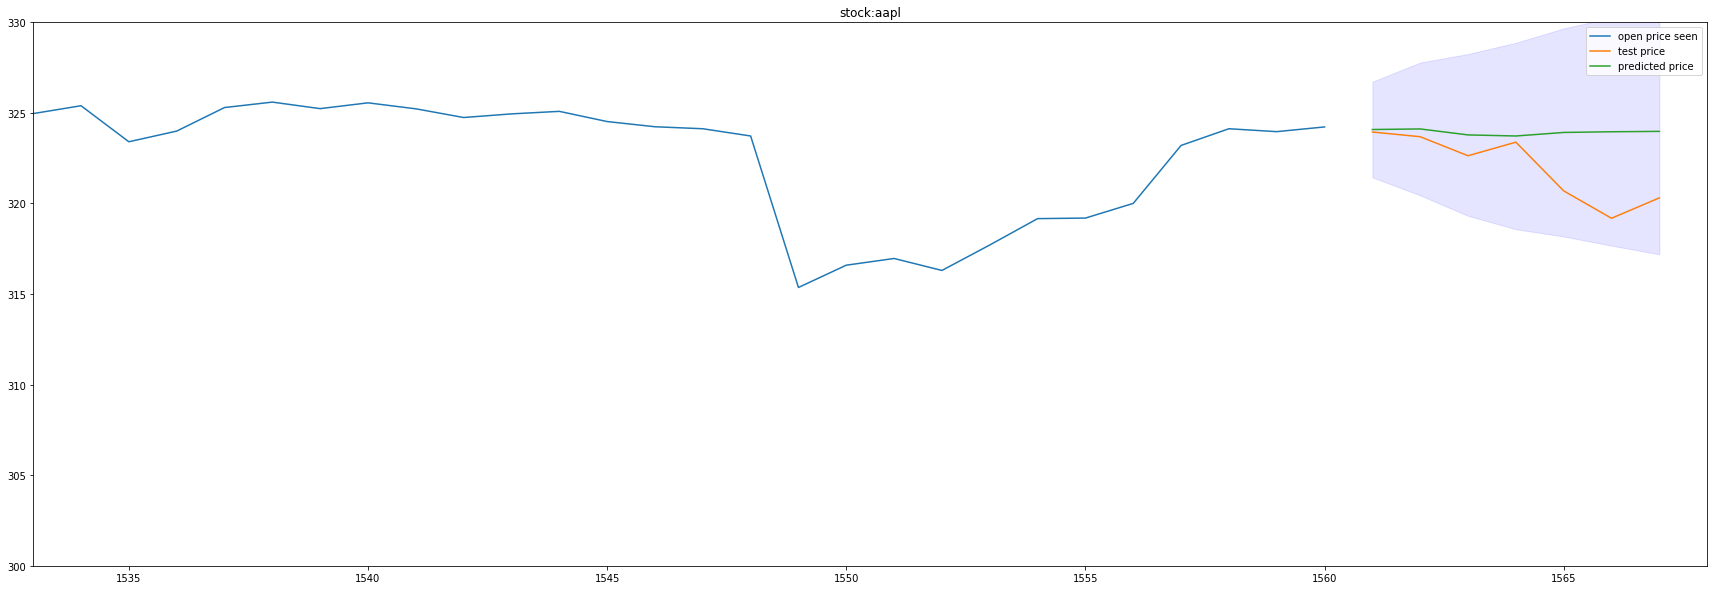

1561    323.940
1562    323.680
1563    322.630
1564    323.380
1565    320.690
1566    319.180
1567    320.305
Name: open, dtype: float64
0    324.077257
1    324.108998
2    323.779554
3    323.720263
4    323.915645
5    323.953821
6    323.974916
dtype: float64
mean suqaure error
6.900367118467258
1561


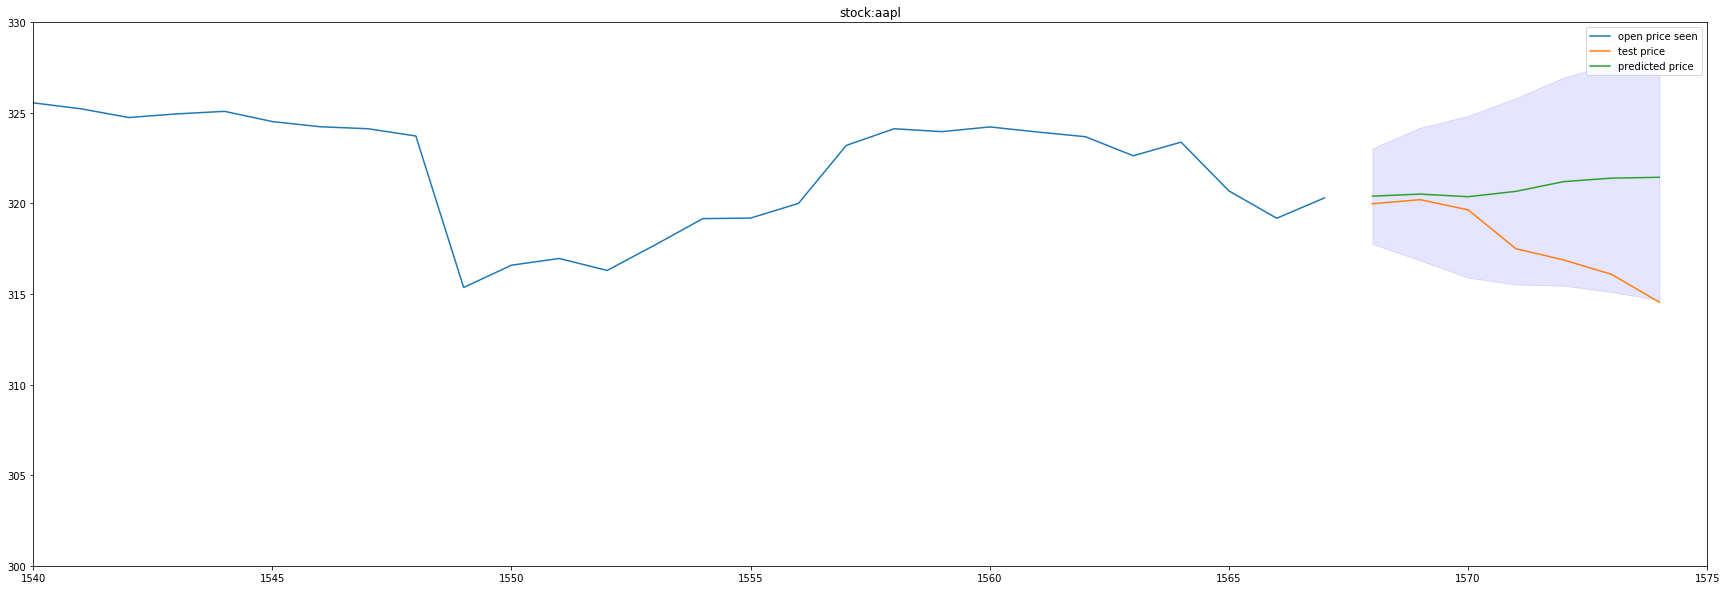

1568    319.9818
1569    320.2050
1570    319.6450
1571    317.5000
1572    316.8800
1573    316.0843
1574    314.5464
Name: open, dtype: float64
0    320.400090
1    320.513460
2    320.368823
3    320.664090
4    321.201854
5    321.394685
6    321.441107
dtype: float64
mean suqaure error
15.031585633985259
1568


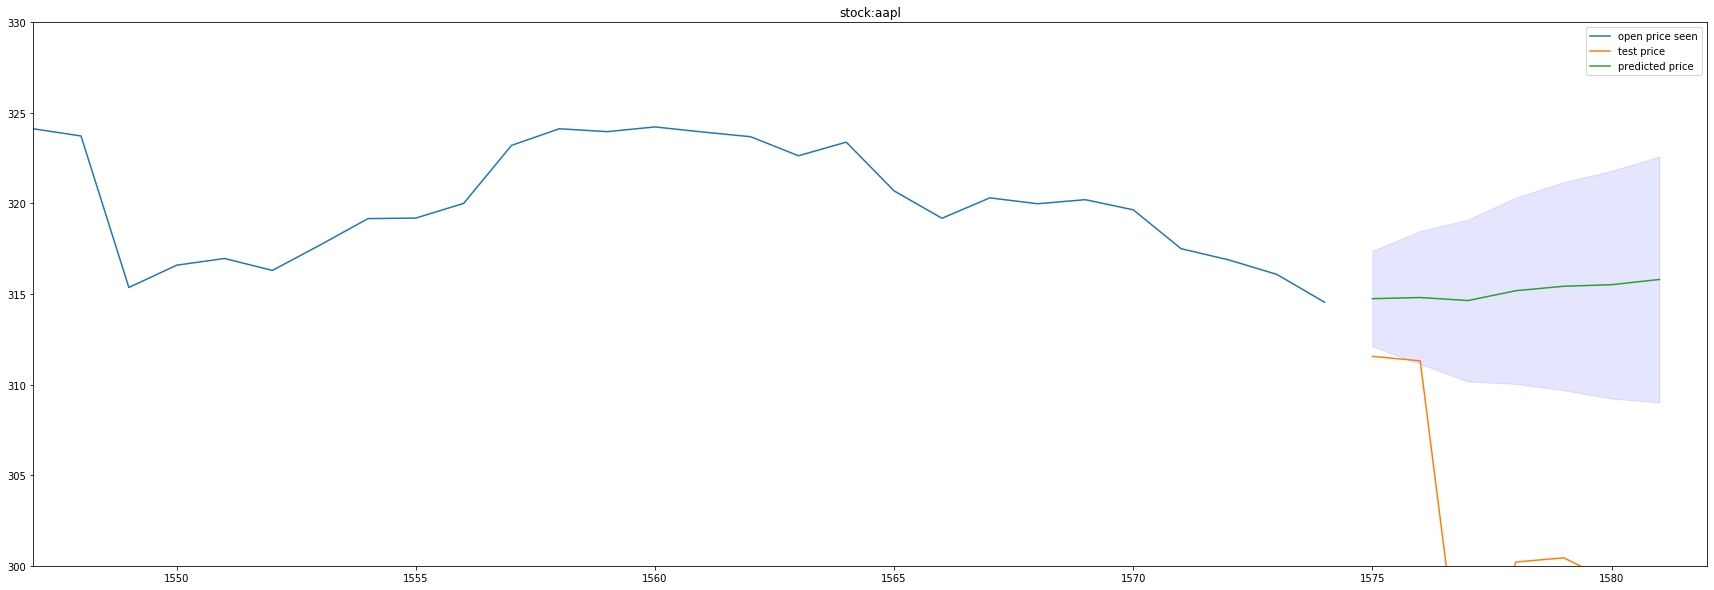

1575    311.5600
1576    311.3100
1577    290.4610
1578    300.2099
1579    300.4400
1580    299.1500
1581    299.8300
Name: open, dtype: float64
0    314.742191
1    314.805542
2    314.638521
3    315.181976
4    315.428557
5    315.512665
6    315.801549
dtype: float64
mean suqaure error
225.50639684799458
1575


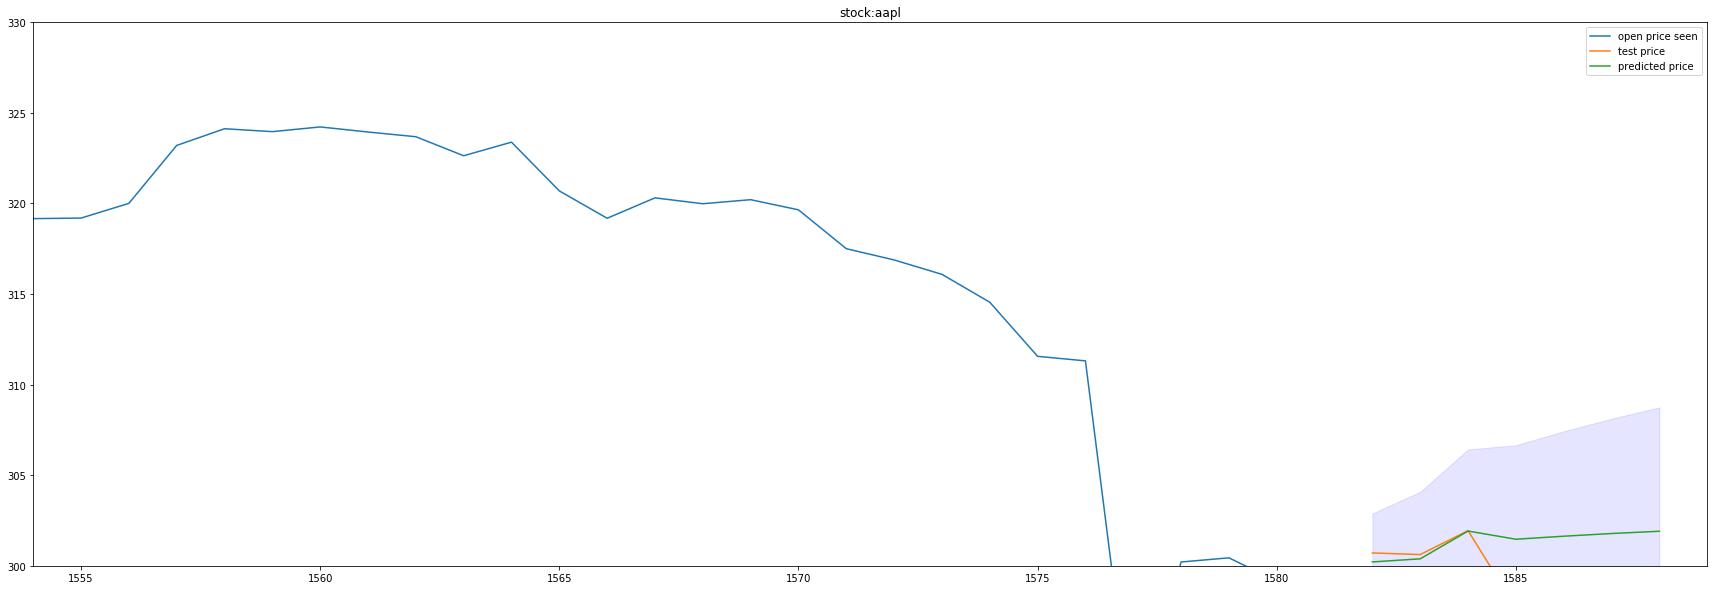

1582    300.7100
1583    300.6200
1584    301.9400
1585    297.6900
1586    292.2306
1587    294.1800
1588    294.3427
Name: open, dtype: float64
0    300.213878
1    300.384156
2    301.917509
3    301.466626
4    301.632681
5    301.781535
6    301.906581
dtype: float64
mean suqaure error
31.137132127966517
1582


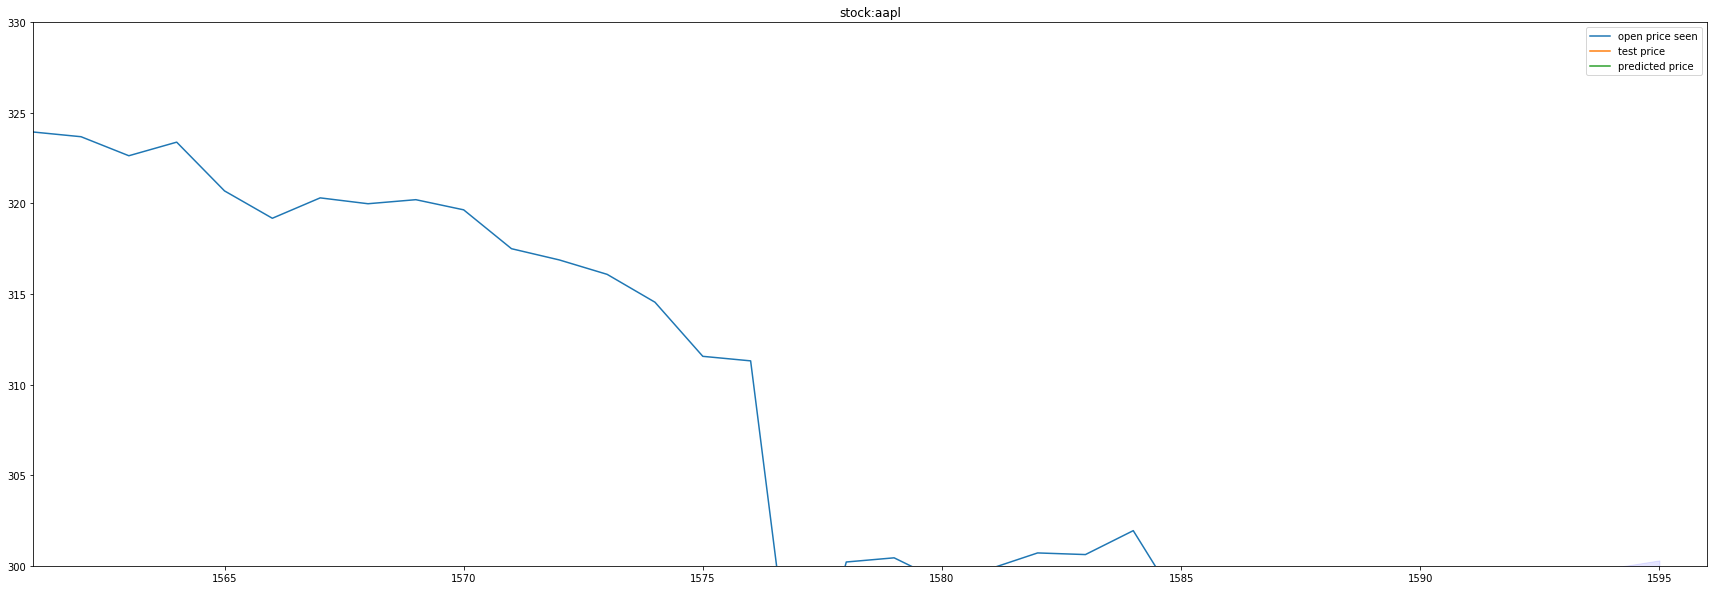

1589    289.6700
1590    288.6100
1591    286.5300
1592    294.8365
1593    297.5200
1594    292.8800
1595    294.2674
Name: open, dtype: float64
0    294.010951
1    293.891323
2    292.579285
3    293.354351
4    293.758433
5    293.293274
6    293.190889
dtype: float64
mean suqaure error
14.429413651909824
1589


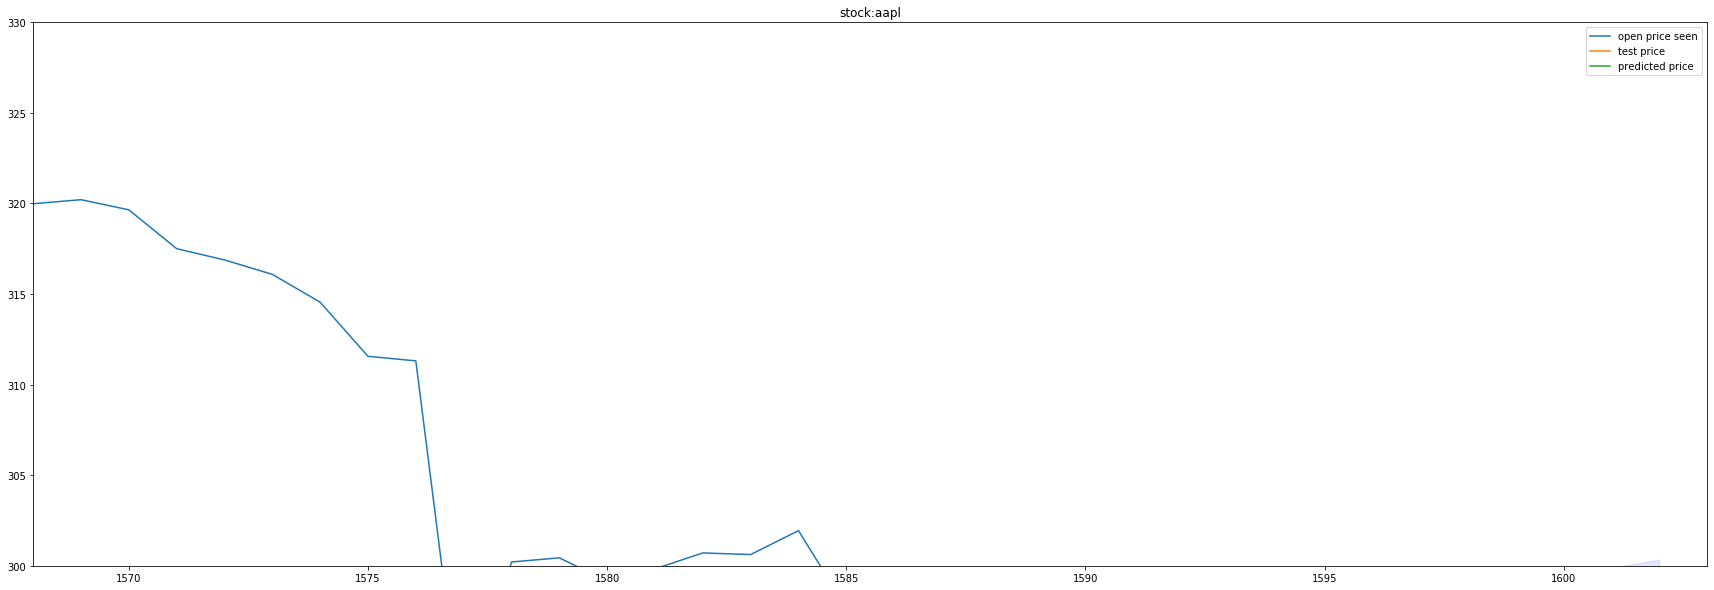

1596    292.0900
1597    292.8300
1598    281.5050
1599    277.1436
1600    280.9200
1601    282.7800
1602    281.3051
Name: open, dtype: float64
0    294.528001
1    294.643929
2    293.679144
3    293.345145
4    292.928649
5    293.302447
6    293.240540
dtype: float64
mean suqaure error
116.75975440765146
1596


KeyboardInterrupt: 

In [50]:

for i in range (TRAIN_NUM, aapl['open'].shape[0],PRE_NUM):
    new_data = aapl['open'][i:i+PRE_NUM]
    print(i)
    fit1.update(new_data)
    preds, conf_int = fit1.predict(7, return_conf_int=True)
    x_axis = np.arange(i+PRE_NUM+PRE_NUM)

    fig = plt.figure(figsize=(30,10))  # an empty figure with no axes
    plt.plot(x_axis[:i+7], pd.Series(aapl['open'][:i+PRE_NUM]),label = 'open price seen')
    plt.plot(x_axis[i+7:],pd.Series(aapl['open'][i+PRE_NUM:i+PRE_NUM+PRE_NUM]),label = 'test price')
    plt.plot(x_axis[i+7:],pd.Series(preds),label = 'predicted price')
    plt.fill_between(x_axis[i+7:],
                     conf_int[:, 0], conf_int[:, 1],
                     alpha=0.1, color='b')
    plt.axis([i-21, i+PRE_NUM+PRE_NUM, 300, 330])
    plt.legend()
    plt.title("stock:" + "aapl")
    plt.show()
    
    
    print(pd.Series(aapl['open'][i+PRE_NUM:i+PRE_NUM+PRE_NUM]))
    print(pd.Series(preds))
    print("mean suqaure error")
    mse = mean_squared_error(pd.Series(aapl['open'][i+PRE_NUM:i+PRE_NUM+PRE_NUM]),pd.Series(preds))
    print(mse)
    mse_list.append(mse)
    

In [31]:
sum(mse_list)/len(mse_list)

19.038431858904435